In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import scipy.stats as stats
from xgboost import XGBRegressor

In [2]:
df_train = pd.read_csv('train.csv')
df_train.set_index(df_train['Id'],inplace = True)
df_test = pd.read_csv('test.csv')
df_test.set_index(df_test['Id'],inplace = True)

In [3]:
df_1 = pd.concat([df_train,df_test])

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
df_1.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,4.694416,57.137718,102.201312,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,46.396825,42.517628,179.334253,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


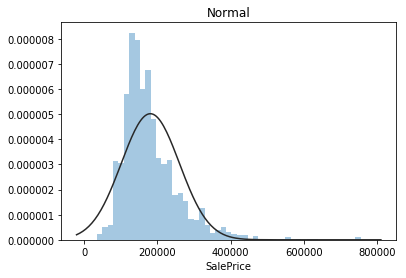

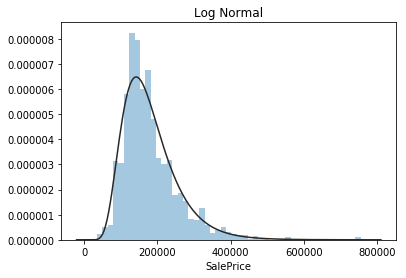

In [7]:
y = df_train['SalePrice']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [8]:
df_1.loc[:,list((100*(df_1.isnull().sum()/len(df_1.index))>30))].columns

Index(['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC', 'SalePrice'], dtype='object')

In [4]:
delete_col = ['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC']
df_train = df_train.drop(delete_col, axis =1)
df_1 = df_1.drop(delete_col, axis =1)

In [10]:
df_corr = (df_train.corr())
df_corr = df_corr['SalePrice']
df_corr

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

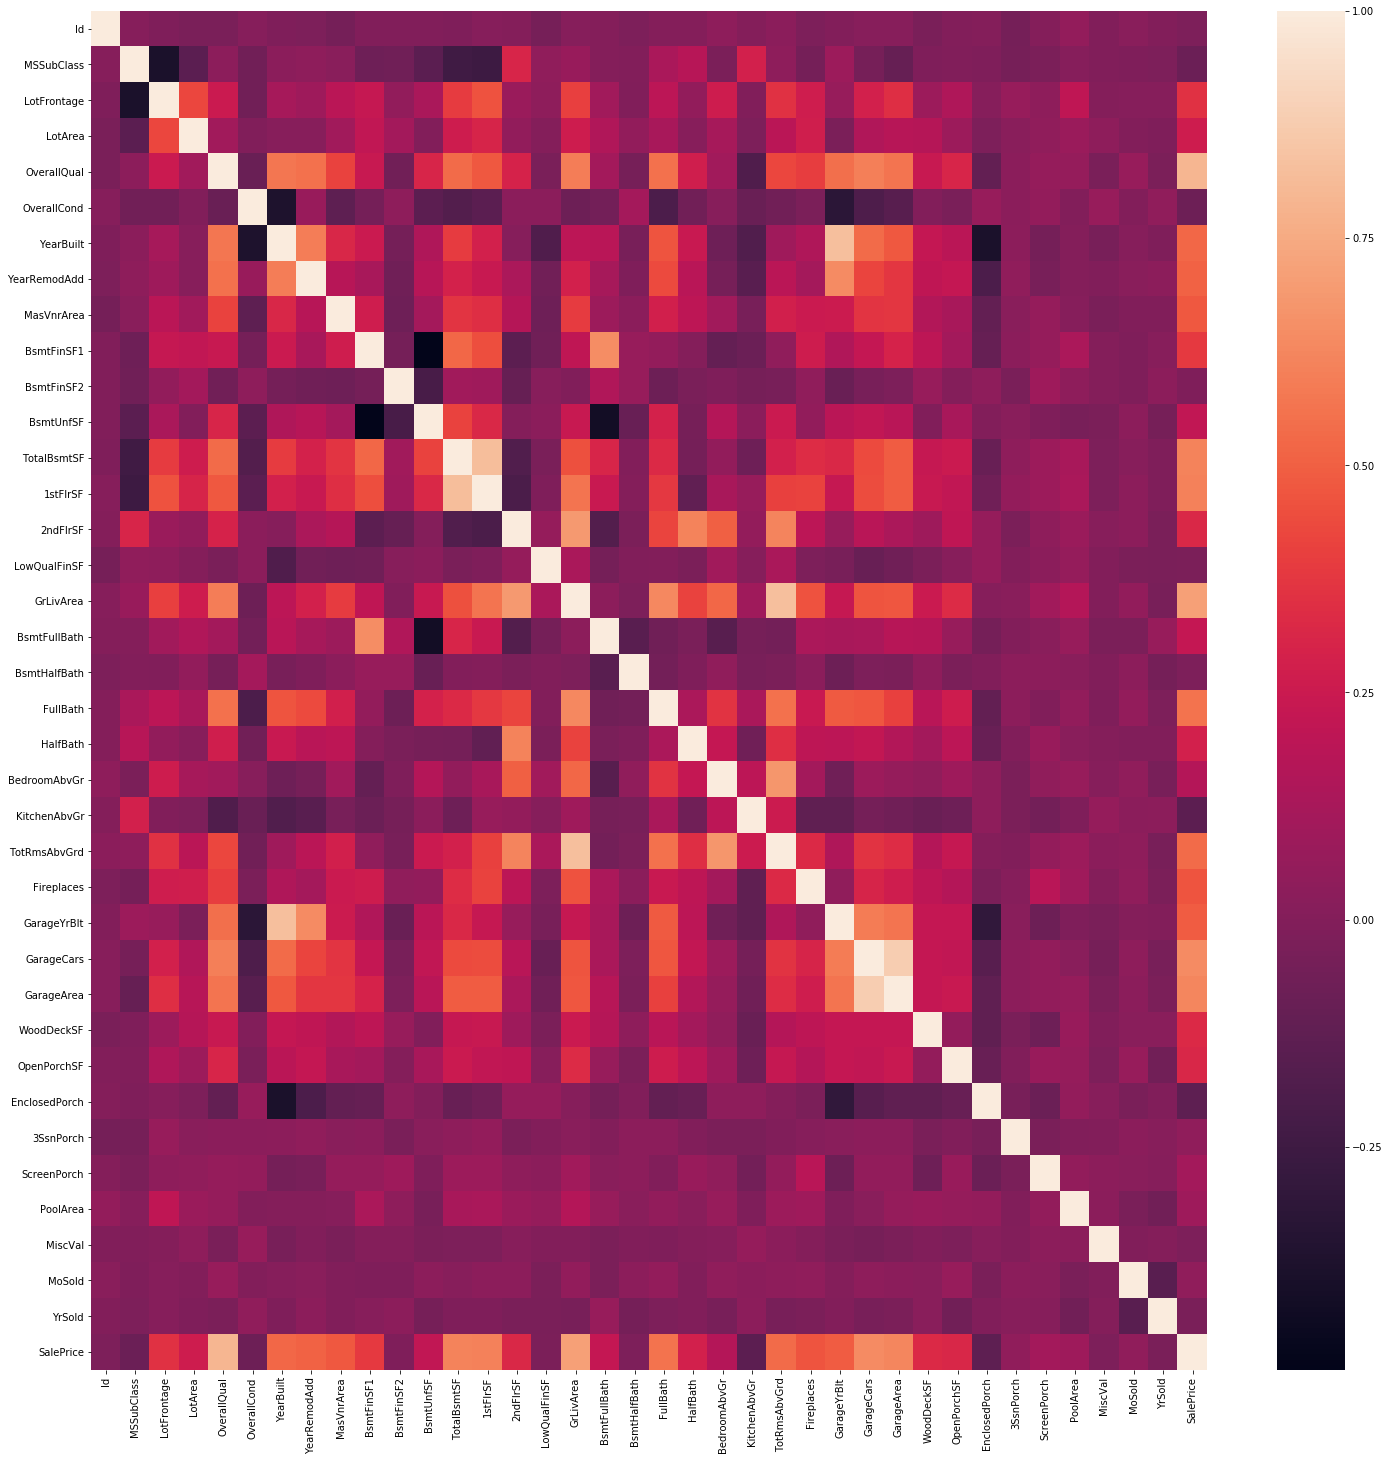

In [11]:
fig= plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr())

In [12]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [5]:
df_train['Age_of_building']=2020 - df_train['YearBuilt']
df_train['Lastremovated']=2020 - df_train['YearRemodAdd']
df_1['Age_of_building']=2020 - df_1['YearBuilt']
df_1['Lastremovated']=2020 - df_1['YearRemodAdd']
df_train['Last_sold']=2020 - df_train['YrSold']
df_1['Last_sold']=2020 - df_1['YrSold']
df_1.drop(['YrSold','YearBuilt','YearRemodAdd'],axis =1, inplace = True)
df_train.drop(['YrSold','YearBuilt','YearRemodAdd'],axis =1, inplace = True)

In [6]:
df_1.loc[:,list((100*(df_1.isnull().sum()/len(df_1.index))>0))].columns

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'SalePrice', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

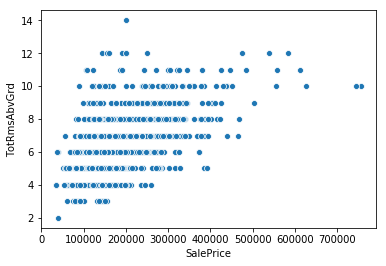

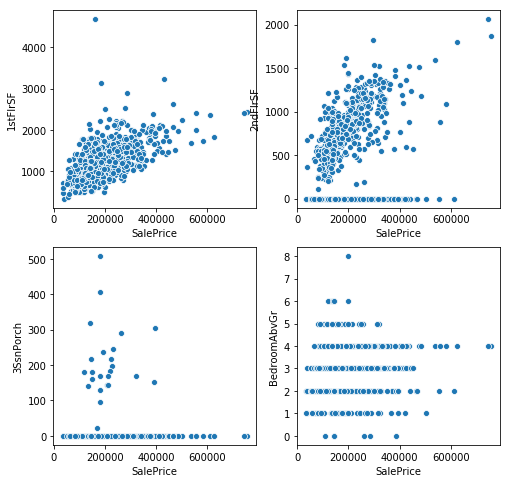

In [7]:
sns.scatterplot(df_train['SalePrice'],df_train['TotRmsAbvGrd'])
fig = plt.figure(figsize=(8,8))
fig1 = fig.add_subplot(221); 
sns.scatterplot(df_train['SalePrice'],df_train['1stFlrSF'])
fig2 = fig.add_subplot(222); 
sns.scatterplot(df_train['SalePrice'],df_train['2ndFlrSF'])
fig3 = fig.add_subplot(223); 
sns.scatterplot(df_train['SalePrice'],df_train['3SsnPorch'])
fig4 = fig.add_subplot(224); 
sns.scatterplot(df_train['SalePrice'],df_train['BedroomAbvGr'])


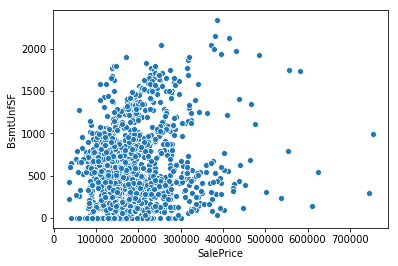

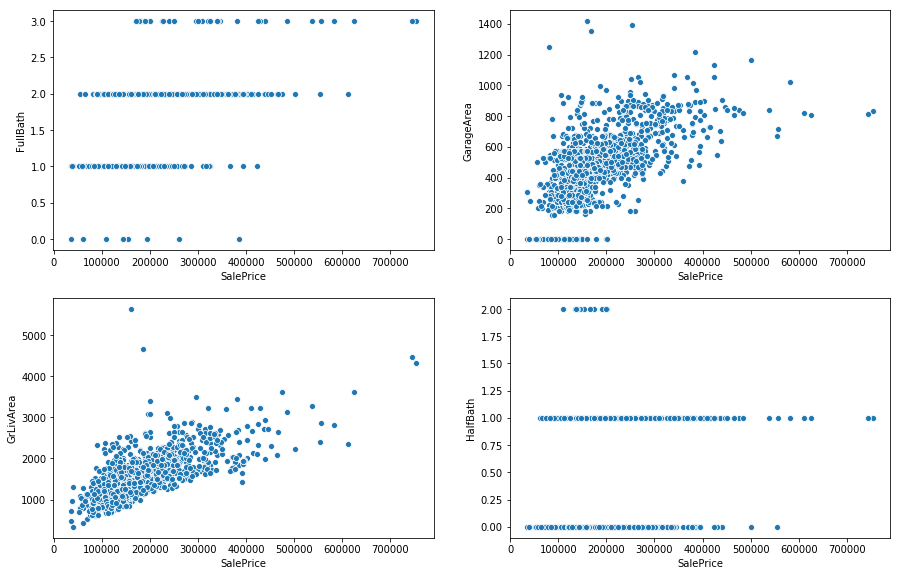

In [16]:
sns.scatterplot(df_train['SalePrice'],df_train['BsmtUnfSF'])

fig15 = plt.figure(figsize=(15, 15))
fig5 = fig15.add_subplot(321); 
sns.scatterplot(df_train['SalePrice'],df_train['FullBath'])
fig6 = fig15.add_subplot(322); 
sns.scatterplot(df_train['SalePrice'],df_train['GarageArea'])
fig6 = fig15.add_subplot(323); 
sns.scatterplot(df_train['SalePrice'],df_train['GrLivArea'])
fig6 = fig15.add_subplot(324); 
sns.scatterplot(df_train['SalePrice'],df_train['HalfBath'])


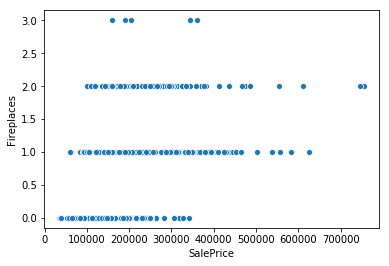

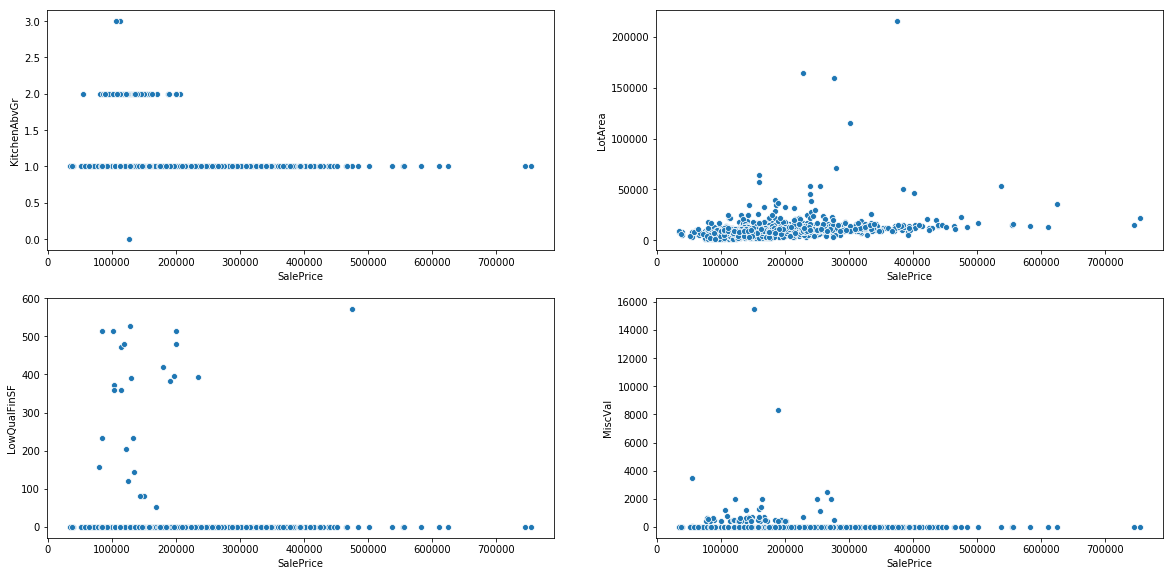

In [17]:
sns.scatterplot(df_train['SalePrice'],df_train['Fireplaces'])
fig25 = plt.figure(figsize=(20, 15))
fig5 = fig25.add_subplot(321); 
sns.scatterplot(df_train['SalePrice'],df_train['KitchenAbvGr'])
fig6 = fig25.add_subplot(322); 
sns.scatterplot(df_train['SalePrice'],df_train['LotArea'])
fig6 = fig25.add_subplot(323); 
sns.scatterplot(df_train['SalePrice'],df_train['LowQualFinSF'])
fig6 = fig25.add_subplot(324); 
sns.scatterplot(df_train['SalePrice'],df_train['MiscVal'])



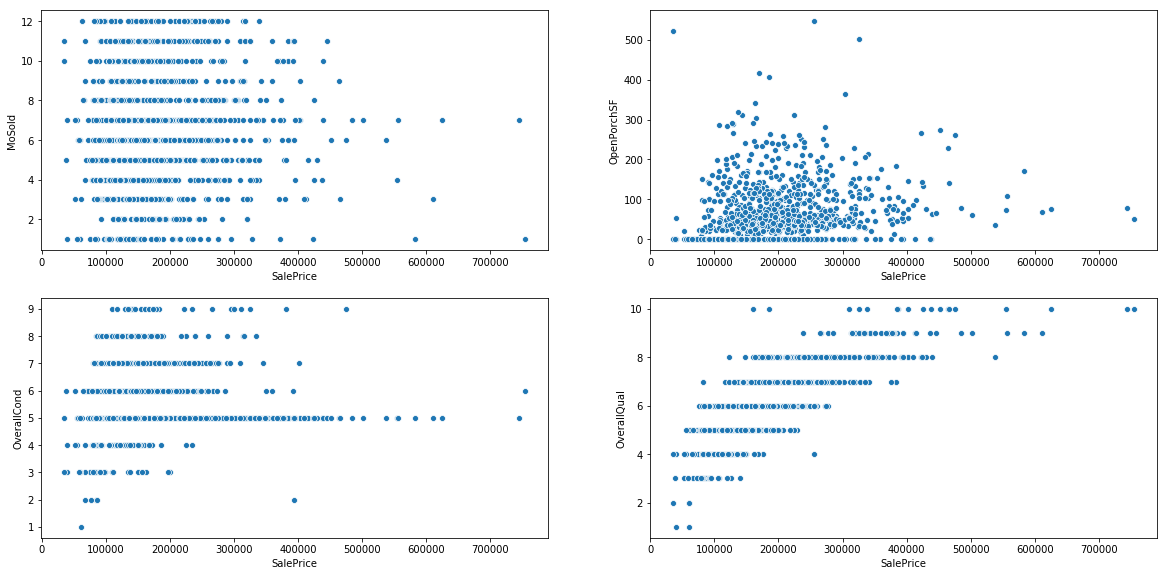

In [18]:
# KitchenAbvGr	LotArea	LowQualFinSF	MSSubClass	MiscVal	MoSold	OpenPorchSF	OverallCond	OverallQual	PoolArea	
# SalePrice	ScreenPorch	TotRmsAbvGrd	TotalBsmtSF	WoodDeckSF	Age_of_building	Lastremovated	Last_sold# 
fig25 = plt.figure(figsize=(20, 15))
fig5 = fig25.add_subplot(321); 
sns.scatterplot(df_train['SalePrice'],df_train['MoSold'])#can be removed
fig6 = fig25.add_subplot(322); 
sns.scatterplot(df_train['SalePrice'],df_train['OpenPorchSF'])
fig6 = fig25.add_subplot(323); 
sns.scatterplot(df_train['SalePrice'],df_train['OverallCond'])
fig6 = fig25.add_subplot(324); 
sns.scatterplot(df_train['SalePrice'],df_train['OverallQual'])


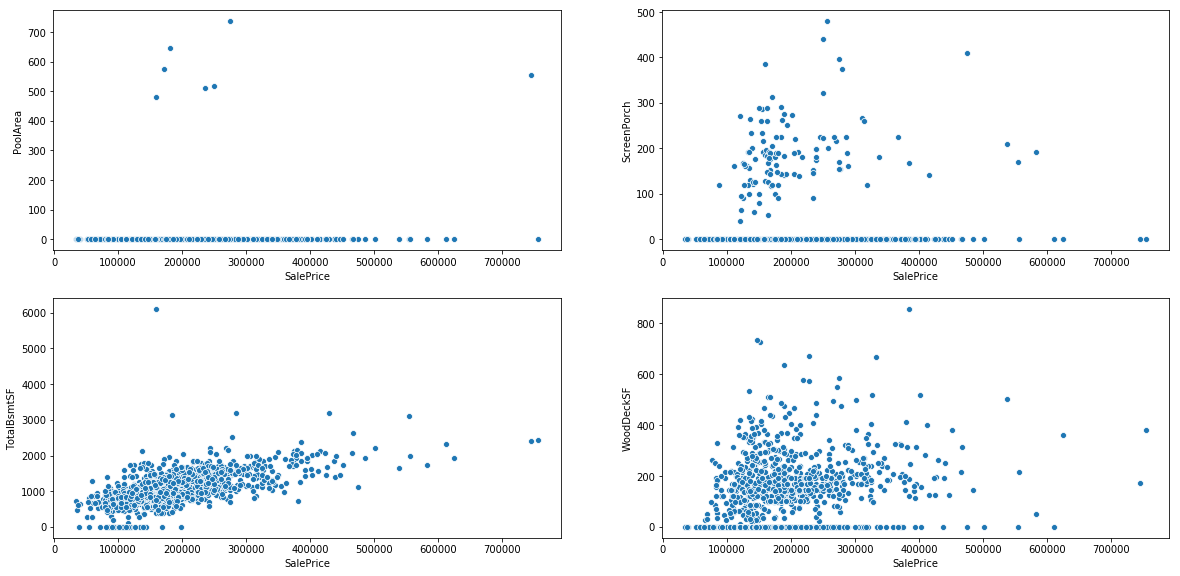

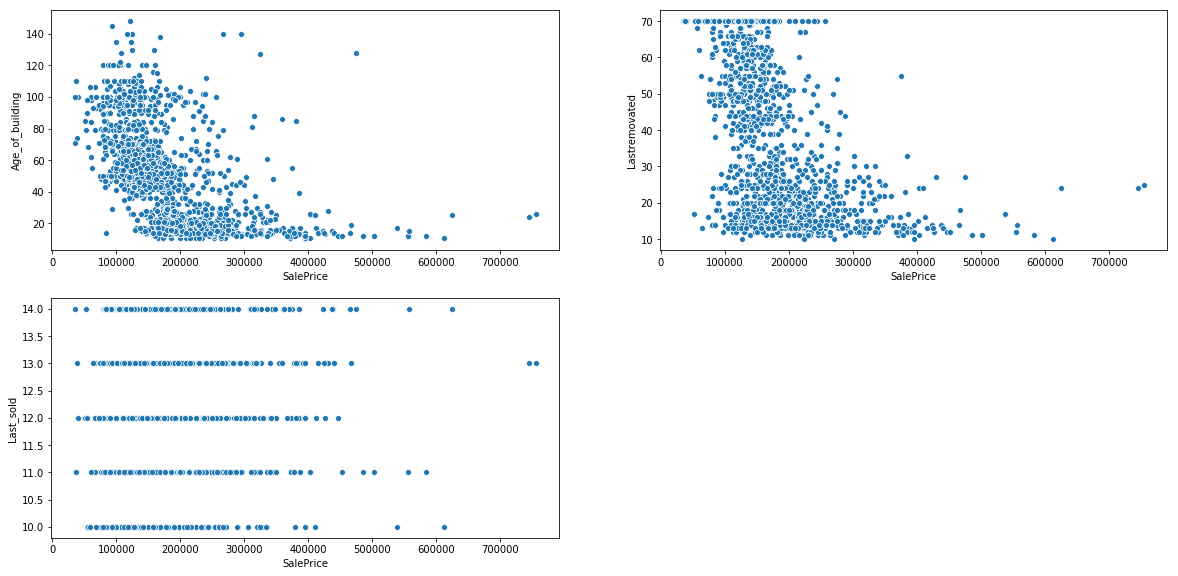

In [19]:

fig26 = plt.figure(figsize=(20, 15))
fig5 = fig26.add_subplot(321); 
sns.scatterplot(df_train['SalePrice'],df_train['PoolArea'])
fig6 = fig26.add_subplot(322); 
sns.scatterplot(df_train['SalePrice'],df_train['ScreenPorch'])
fig6 = fig26.add_subplot(323); 
sns.scatterplot(df_train['SalePrice'],df_train['TotalBsmtSF'])
fig6 = fig26.add_subplot(324); 
sns.scatterplot(df_train['SalePrice'],df_train['WoodDeckSF'])

fig27 = plt.figure(figsize=(20, 15))
fig5 = fig27.add_subplot(321); 
sns.scatterplot(df_train['SalePrice'],df_train['Age_of_building'])
fig6 = fig27.add_subplot(322); 
sns.scatterplot(df_train['SalePrice'],df_train['Lastremovated'])
fig6 = fig27.add_subplot(323); 
sns.scatterplot(df_train['SalePrice'],df_train['Last_sold'])#can be deleted

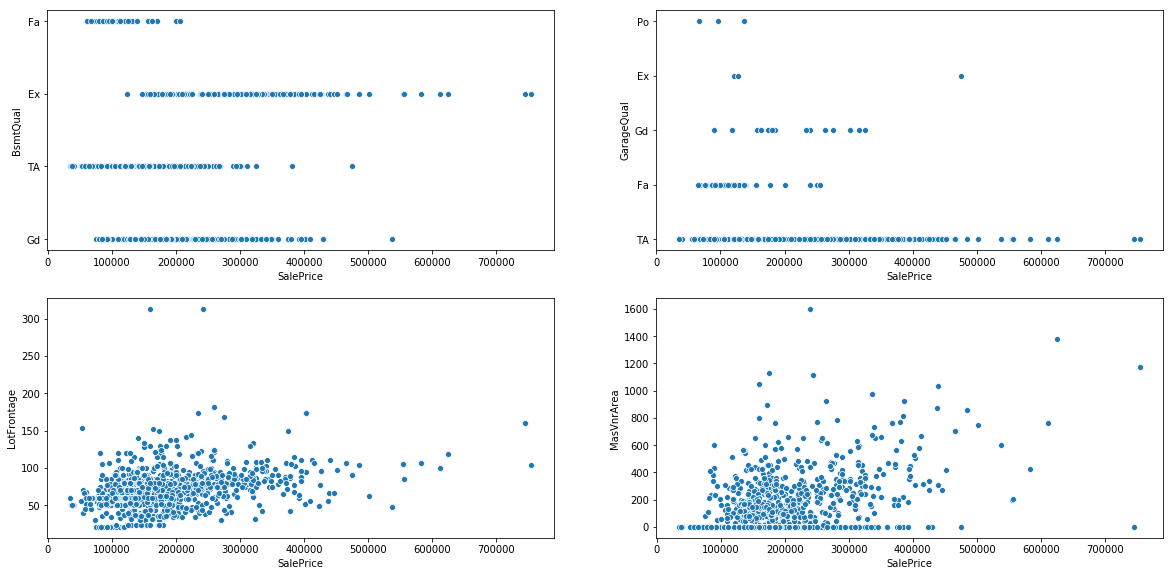

In [20]:
fig27 = plt.figure(figsize=(20, 15))
fig5 = fig27.add_subplot(321); 
sns.scatterplot(df_train['SalePrice'],df_train['BsmtQual'])
fig6 = fig27.add_subplot(322); 
sns.scatterplot(df_train['SalePrice'],df_train['GarageQual'])
fig8 = fig27.add_subplot(323); 
sns.scatterplot(df_train['SalePrice'],df_train['LotFrontage'])
fig7 = fig27.add_subplot(324); 
sns.scatterplot(df_train['SalePrice'],df_train['MasVnrArea'])

In [8]:
df_1 = df_1.drop(['BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','Last_sold','MoSold','GarageYrBlt'],axis =1)
df_train = df_train.drop(['BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','Last_sold','MoSold','GarageYrBlt'],axis =1)

In [9]:
cont =[]
cat = []
for i in df_1.columns:
    if df_1[i].dtypes == 'int64' or df_1[i].dtypes == 'float64':
        cont.append(i)
    else:
        cat.append(i)

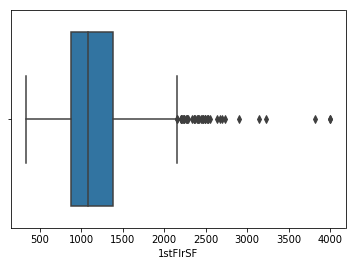

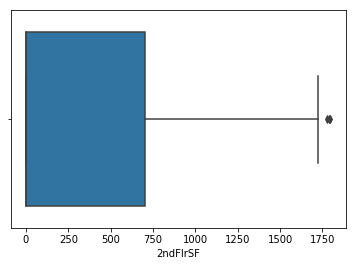

KeyError: '3SsnPorch'

In [58]:
for i in cont:
    sns.boxplot(df_1[i])
    plt.show()

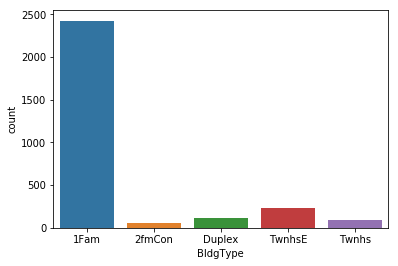

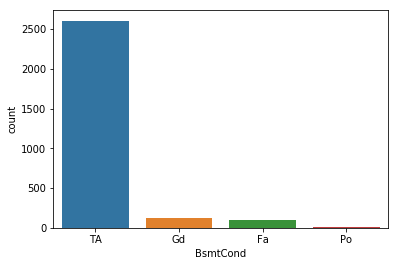

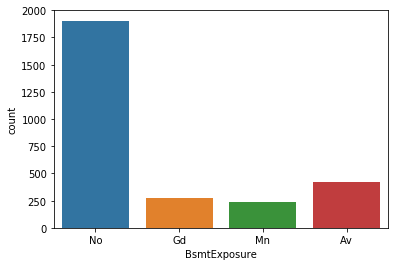

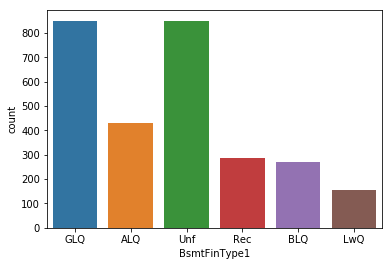

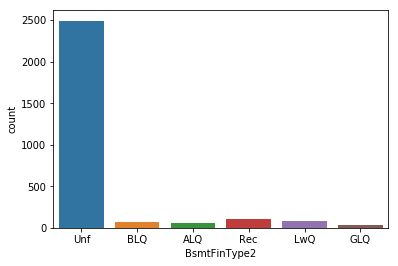

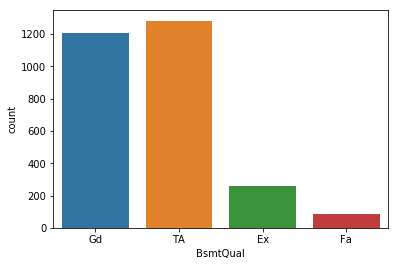

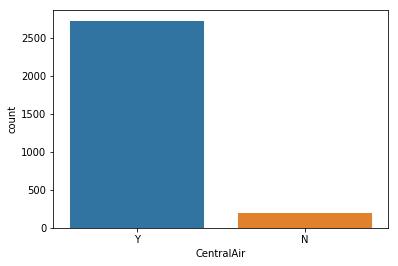

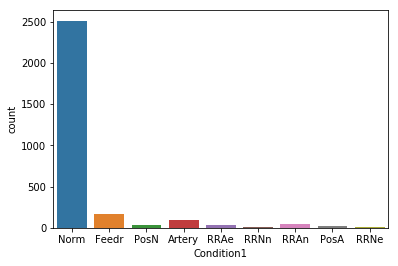

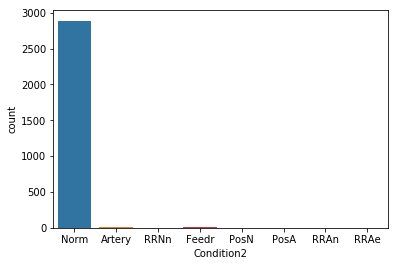

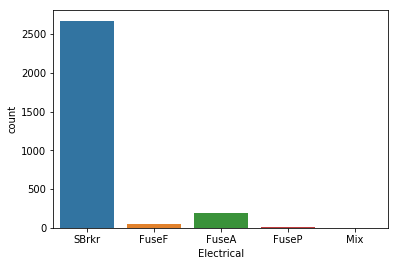

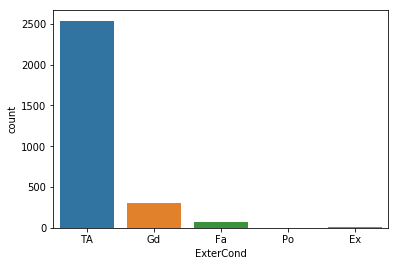

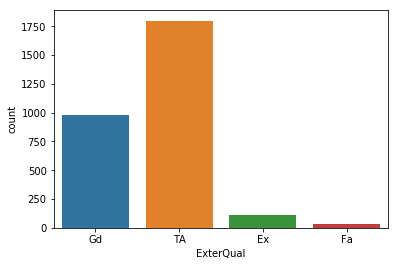

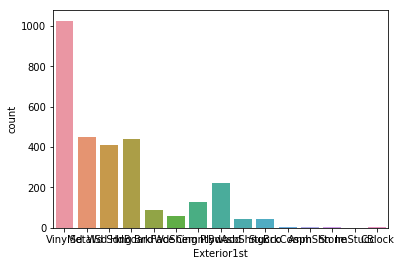

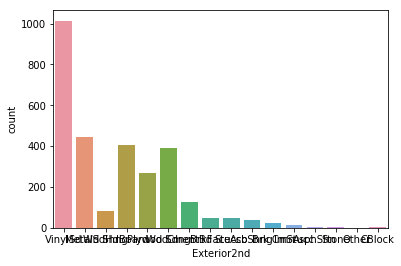

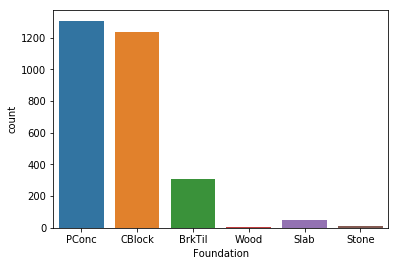

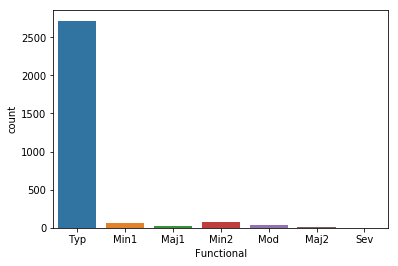

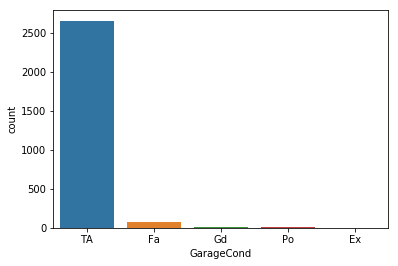

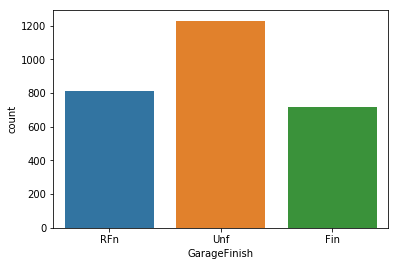

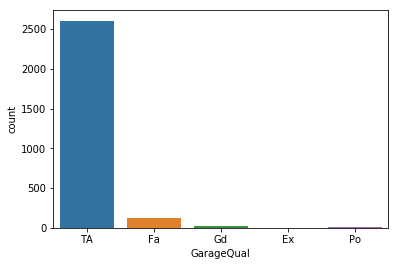

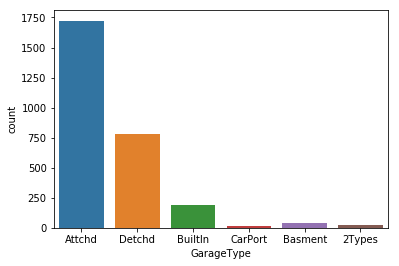

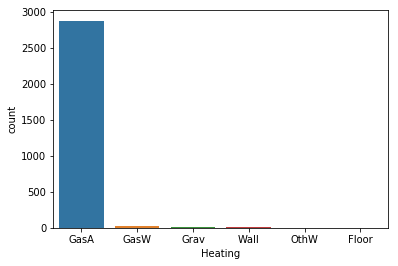

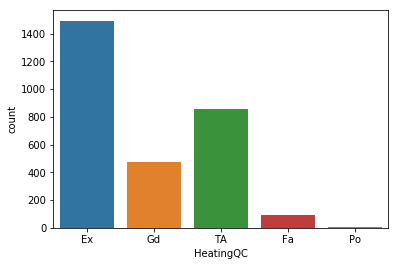

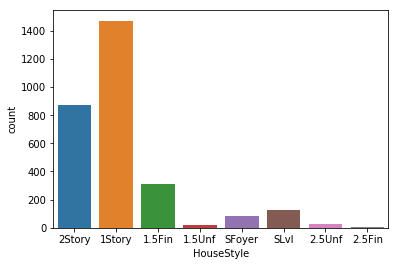

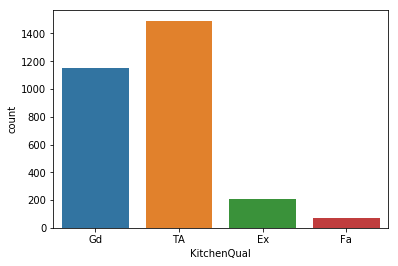

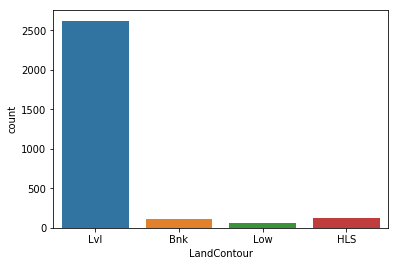

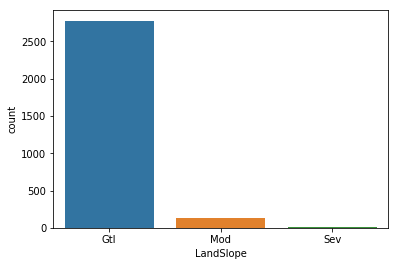

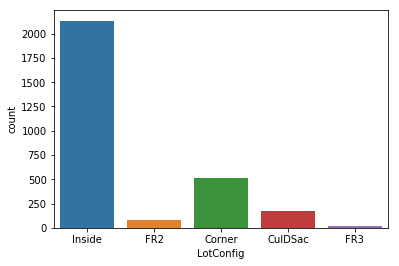

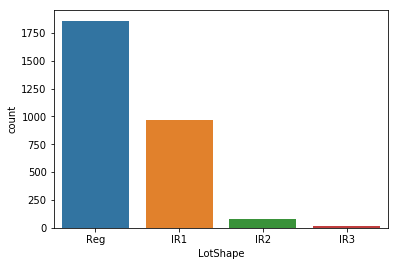

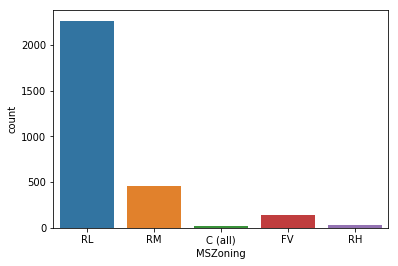

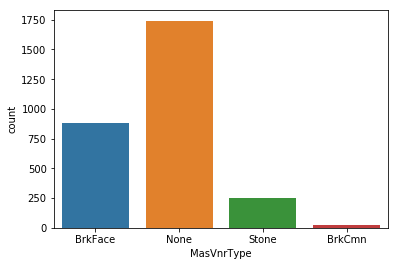

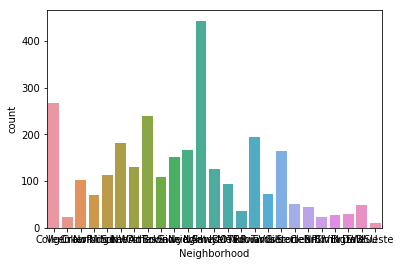

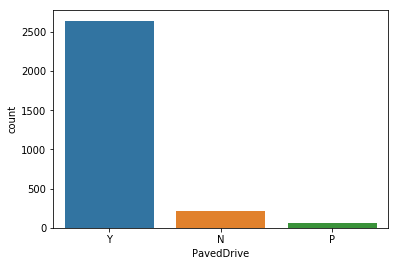

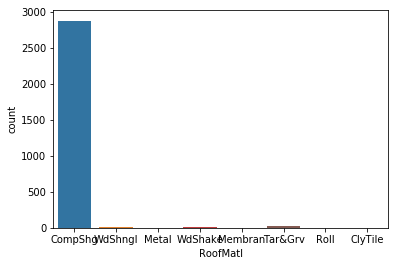

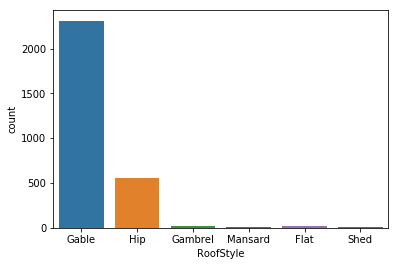

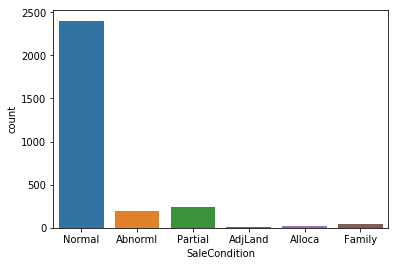

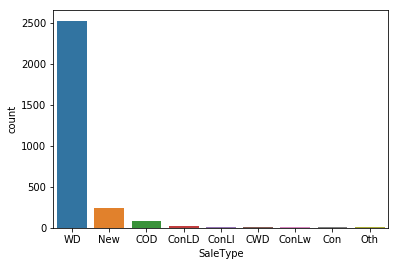

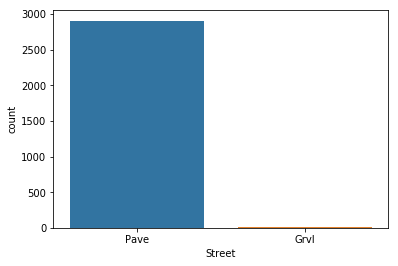

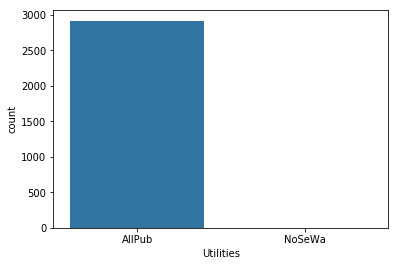

In [24]:
for i in cat:
    sns.countplot(df_1[i])
    plt.show()

In [25]:
df_1.isnull().sum()/len(df_1)

1stFlrSF           0.000000
2ndFlrSF           0.000000
3SsnPorch          0.000000
BedroomAbvGr       0.000000
BldgType           0.000000
BsmtCond           0.028092
BsmtExposure       0.028092
BsmtFinType1       0.027064
BsmtFinType2       0.027407
BsmtQual           0.027749
BsmtUnfSF          0.000343
CentralAir         0.000000
Condition1         0.000000
Condition2         0.000000
Electrical         0.000343
EnclosedPorch      0.000000
ExterCond          0.000000
ExterQual          0.000000
Exterior1st        0.000343
Exterior2nd        0.000343
Fireplaces         0.000000
Foundation         0.000000
FullBath           0.000000
Functional         0.000685
GarageArea         0.000343
GarageCars         0.000343
GarageCond         0.054471
GarageFinish       0.054471
GarageQual         0.054471
GarageType         0.053786
GrLivArea          0.000000
HalfBath           0.000000
Heating            0.000000
HeatingQC          0.000000
HouseStyle         0.000000
Id                 0

In [10]:
df_1['1stFlrSF'] = df_1['1stFlrSF'].apply(lambda x: 4000 if x >4000 else x)
df_1['2ndFlrSF'] = df_1['2ndFlrSF'].apply(lambda x: 1700 if x >1800 else x)
df_1['3SsnPorch'] = df_1['3SsnPorch'].apply(lambda x: 290 if x >300 else x)
df_1['GrLivArea'] = df_1['GrLivArea'].apply(lambda x: 4000 if x >4500 else x)
df_1['LotArea'] = df_1['LotArea'].apply(lambda x: 15000 if x >15000 else x)
df_1['PoolArea'] = df_1['PoolArea'].apply(lambda x: 600 if x >600 else x)
df_1['ScreenPorch'] = df_1['ScreenPorch'].apply(lambda x: 500 if x >500 else x)
df_1['TotalBsmtSF'] = df_1['TotalBsmtSF'].apply(lambda x: 4000 if x >4000 else x)
df_1['WoodDeckSF'] = df_1['WoodDeckSF'].apply(lambda x: 700 if x >700 else x)
df_1['LotFrontage'] = df_1['LotFrontage'].apply(lambda x: 600 if x >600 else x)
df_1['MasVnrArea'] = df_1['MasVnrArea'].apply(lambda x: 1200 if x >1200 else x)

In [57]:
df_1['SalePrice'] = df_1['SalePrice'].apply(lambda x: 600000 if x >600000 else x)

In [11]:
df_1['LotFrontage'].isna().sum()

a = df_1['LotFrontage'].values

m = np.isnan(a)

a[m] = np.random.normal(df_1['LotFrontage'].mean(),df_1['LotFrontage'].std(),df_1['LotFrontage'].isna().sum())

df_1['LotFrontage'].isna().sum()

0

In [12]:
df_1['MasVnrArea'].isnull().sum()

23

In [13]:
df_1['MasVnrArea'].fillna(0,inplace = True)

In [14]:
df_1['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [15]:
df_1['BsmtQual'].isna().sum()

81

In [16]:
df_1['BsmtQual'].fillna('TA',inplace = True)

In [17]:
df_1.loc[:,list((100*(df_1.isnull().sum()/len(df_1.index))>0))].columns

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'KitchenQual', 'MSZoning', 'MasVnrType', 'SalePrice', 'SaleType',
       'TotalBsmtSF', 'Utilities'],
      dtype='object')

In [18]:
df_1['BsmtCond'].value_counts()
df_1['BsmtCond'].isna().sum()
df_1['BsmtCond'].fillna('TA',inplace = True)

In [19]:
df_1['BsmtExposure'].value_counts()
df_1['BsmtExposure'].isna().sum()
df_1['BsmtExposure'].fillna('No',inplace = True)

In [20]:
df_1['BsmtFinType1'].value_counts()
df_1['BsmtFinType1'].isna().sum()
df_1['BsmtFinType1'].fillna('Unf',inplace = True)

In [21]:
df_1['BsmtFinType2'].isna().sum()
df_1['BsmtFinType2'].value_counts()
df_1['BsmtFinType2'].fillna('Unf',inplace = True)

In [22]:
df_1['Electrical'].value_counts()
df_1['Electrical'].fillna('SBrkr',inplace = True)

In [23]:
df_1['MasVnrType'].fillna('None',inplace = True)
df_1['GarageType'].fillna('Attchd',inplace = True)
df_1['GarageFinish'].fillna('Unf',inplace = True)
df_1['GarageQual'].fillna('TA',inplace = True)
df_1['GarageCond'].fillna('TA',inplace = True)



In [24]:
#Drop PoolArea,LowQualFinSF, -- BsmthHalfBath, --KitchenAbvGr, 3ssnporch, --Miscval, Garagecars, screenporch,MoSold
#outliear Lot Area, MasVnrArea,TotalBsmtSF,1stFlrSF,2nfFlrSF, GRLivArea, Wooddecksf,OpenPorchSF,EnclosedPorch
#calculate totalBsmtSF-BsmtUnfSF
#drop BsmtUnfSF,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,
#drop bsmthalfbath as value is more for 0

In [25]:
#Drop Street,Utilities,Roofmatl,Heating,Bsmtfintyp2,CentralAir,Functional,GarageYrBly
#Drop PoolArea,LowQualFinSF, -- BsmthHalfBath, --KitchenAbvGr, 3ssnporch, --Miscval, Garagecars, screenporch,MoSold
#outliear Miscval, Lot Area, MasVnrArea, GRLivArea, Wooddecksf
#calculate totalBsmtSF-BsmtUnfSF
#drop BsmtUnfSF,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,
#drop bsmthalfbath as value is more for 0

In [26]:
df_1 = df_1.drop(['Street','Utilities','RoofMatl','Heating','BsmtFinType2','CentralAir','Functional'],axis=1)

In [27]:
df_1 = df_1.drop(['PoolArea','LowQualFinSF','3SsnPorch','GarageCars','ScreenPorch','BsmtFinType1'],axis=1)

In [28]:
df_1 = df_1.drop(['MiscVal','KitchenAbvGr','Condition2','PavedDrive','LandSlope'],axis=1)

In [29]:
# df_1.drop(df_1.TotalBsmtSF[(df_1.TotalBsmtSF > 2800)].index,inplace = True)
df_1['TotalBsmtSF'] = df_1['TotalBsmtSF'].apply(lambda x: 2700 if x >2800 else x)

In [30]:
df_1['BsmtUnfSF'].fillna('559',inplace = True)
df_1['Electrical'].fillna('SBrkr',inplace = True)
df_1['Exterior1st'].fillna('VinylSd',inplace = True)
df_1['Exterior2nd'].fillna('VinylSd',inplace = True)
df_1['GarageArea'].fillna('471',inplace = True)
df_1['KitchenQual'].fillna('TA',inplace = True)
df_1['MSZoning'].fillna('TA',inplace = True)
df_1['SaleType'].fillna('WD',inplace = True)
df_1['TotalBsmtSF'].fillna('1045',inplace = True)


In [31]:
#outliear Lot Area, MasVnrArea, GRLivArea, Wooddecksf
#'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'GarageArea','KitchenQual', 'MSZoning', 'SaleType', 'TotalBsmtSF'
# sns.boxplot(df_1['TotalBsmtSF'])#,'MasVnrArea','GrLivArea','WoodDeckSF'])

In [32]:
# df_1.drop(df_1.LotArea[(df_1.LotArea > df_1.LotArea.quantile(0.98))].index,inplace = True)
# df_1.drop(df_1.MasVnrArea[(df_1.MasVnrArea > df_1.MasVnrArea.quantile(0.97))].index,inplace = True)
# df_1.drop(df_1.GrLivArea[(df_1.GrLivArea > df_1.GrLivArea.quantile(0.98))].index,inplace = True)
# df_1.drop(df_1.WoodDeckSF[(df_1.WoodDeckSF > df_1.WoodDeckSF.quantile(0.98))].index,inplace = True)
# df_1.drop(df_1.TotalBsmtSF[(df_1.TotalBsmtSF > df_1.TotalBsmtSF.quantile(0.98))].index,inplace = True)


In [33]:
# for i in cont:
#     sns.scatterplot(x=df_1[i],y = df_1.SalePrice)
#     plt.show()

In [34]:
#OverallQual, OverallCond
for i in df_1['OverallQual']:
    if i in [1,2,3,4]:
        df_1['OverallQual'] = df_1['OverallQual'].replace(i,'Bad')
    elif i in [5,6,7]:
        df_1['OverallQual'] = df_1['OverallQual'].replace(i,'Average')
    else:
        df_1['OverallQual'] = df_1['OverallQual'].replace(i,'Good')

In [35]:
for i in df_1['OverallCond']:
    if i in [1,2,3,4]:
        df_1['OverallCond'] = df_1['OverallCond'].replace(i,'Bad')
    elif i in [5,6,7]:
        df_1['OverallCond'] = df_1['OverallCond'].replace(i,'Average')
    else:
        df_1['OverallCond'] = df_1['OverallCond'].replace(i,'Good')

In [36]:
for i in df_1['FullBath']:
    if i in [0]:
        df_1['FullBath'] = df_1['FullBath'].replace(i,1)
    elif i in [5,6]:
        df_1['FullBath'] = df_1['FullBath'].replace(i,4)

In [37]:
for i in df_1['TotRmsAbvGrd']:
    if i in [0,1,2,4]:
        df_1['TotRmsAbvGrd'] = df_1['TotRmsAbvGrd'].replace(i,'within_4')
    elif i in [5,6,7]:
        df_1['TotRmsAbvGrd'] = df_1['TotRmsAbvGrd'].replace(i,'5_6_7')
    elif i in [8,9,10]:
        df_1['TotRmsAbvGrd'] = df_1['TotRmsAbvGrd'].replace(i,'8_to_10')
    else:
        df_1['TotRmsAbvGrd'] = df_1['TotRmsAbvGrd'].replace(i,'More_than_10')

In [38]:
# df_1['Fireplaces'] = df_1['Fireplaces'].map(lambda x : 2 if x == 3)
for i in df_1['Fireplaces']:
    if i in [3]:
        df_1['TotRmsAbvGrd'] = df_1['TotRmsAbvGrd'].replace(i,2)

In [39]:
df_1['MSSubClass'].value_counts()
#40 ->30
#180 -> 80
for i in df_1['MSSubClass']:
    if i in [40]:
        df_1['MSSubClass'] = df_1['MSSubClass'].replace(i,30)
    elif i in [180]:
        df_1['MSSubClass'] = df_1['MSSubClass'].replace(i,80)

In [40]:
for i in df_1['Electrical']:
    if i not in ['SBrkr']:
        df_1['Electrical'] = df_1['Electrical'].replace(i,'Others')

In [41]:
for i in df_1['Foundation']:
    if i not in ['PConc','CBlock','BrkTil']:
        df_1['Foundation'] = df_1['Foundation'].replace(i,'Others')

In [42]:
for i in df_1['LotShape']:
    if i in ['IR2','IR3']:
        df_1['LotShape'] = df_1['LotShape'].replace(i,'IR1')

In [43]:
for i in df_1['LotConfig']:
    if i in ['FR2','FR3']:
        df_1['LotConfig'] = df_1['LotConfig'].replace(i,'FR')

In [44]:
for i in df_1['Condition1']:
    if i in ['Feedr','Artery']:
        df_1['Condition1'] = df_1['Condition1'].replace(i,'Adj_Street')
    elif i in ['PosN','PosA']:
        df_1['Condition1'] = df_1['Condition1'].replace(i,'PosF')
    elif i in ['RRAn','RRAe','RRNn','RRNe']:
        df_1['Condition1'] = df_1['Condition1'].replace(i,'Near_Rail')

In [45]:
for i in df_1['HouseStyle']:
    if i in ['1.5Fin','1.5Unf']:
        df_1['HouseStyle'] = df_1['HouseStyle'].replace(i,'1.5Story')
    elif i in ['2.5Fin','2.5Unf']:
        df_1['HouseStyle'] = df_1['HouseStyle'].replace(i,'2.5Story')
    elif i in ['SFoyer','SLvl']:
        df_1['HouseStyle'] = df_1['HouseStyle'].replace(i,'Split')

In [46]:
for i in df_1['RoofStyle']:
    if i not in ['Gable']:
        df_1['RoofStyle'] = df_1['RoofStyle'].replace(i,'Others')

In [47]:
#dropping ext1 & ext2
df_1 = df_1.drop(['Exterior1st','Exterior2nd','Neighborhood','GarageCond'],axis=1)

In [48]:
for i in df_1['MasVnrType']:
    if i not in ['BrkFace','BrkCmn']:
        df_1['MasVnrType'] = df_1['MasVnrType'].replace(i,'Brk')

In [49]:
#ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual
col_name = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual']
for j in col_name:
    for i in df_1[j]:
        if i in ['Ex','Gd']:
            df_1[j] = df_1[j].replace(i,'Good')
        if i in ['TA','Fa']:
            df_1[j] = df_1[j].replace(i,'Average')
        if i in ['Po']:
            df_1[j] = df_1[j].replace(i,'Bad')

df_1.BsmtQual.value_counts()


Good       1467
Average    1452
Name: BsmtQual, dtype: int64

In [50]:
for i in df_1['SaleCondition']:
    if i not in ['Normal','Partial','Abnormal']:
        df_1['SaleCondition'] = df_1['SaleCondition'].replace(i,'Others')

In [51]:
for i in df_1['SaleType']:
    if i not in ['WD','New','COD']:
        df_1['SaleType'] = df_1['SaleType'].replace(i,'Others')

In [52]:
df_1.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BldgType', 'BsmtCond',
       'BsmtExposure', 'BsmtQual', 'BsmtUnfSF', 'Condition1', 'Electrical',
       'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fireplaces', 'Foundation',
       'FullBath', 'GarageArea', 'GarageFinish', 'GarageQual', 'GarageType',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenQual',
       'LandContour', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'RoofStyle', 'SaleCondition', 'SalePrice',
       'SaleType', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'Age_of_building', 'Lastremovated'],
      dtype='object')

In [53]:
col1_name = ['MSSubClass', 'MSZoning', 'LotShape',
       'LandContour', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond','RoofStyle',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 
       'HeatingQC', 'Electrical', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageQual',
       'SaleType',
       'SaleCondition']

In [70]:
df_1.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtQual,BsmtUnfSF,Condition1,Electrical,EnclosedPorch,ExterCond,ExterQual,Fireplaces,Foundation,FullBath,GarageArea,GarageFinish,GarageQual,GarageType,GrLivArea,HalfBath,HeatingQC,HouseStyle,Id,KitchenQual,LandContour,LotArea,LotConfig,LotFrontage,LotShape,MSSubClass,MSZoning,MasVnrArea,MasVnrType,OpenPorchSF,OverallCond,OverallQual,RoofStyle,SaleCondition,SalePrice,SaleType,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,Age_of_building,Lastremovated
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,3,1Fam,Average,No,Good,150,Norm,SBrkr,0,Average,Good,0,PConc,2,548,RFn,Average,Attchd,1710,1,Good,2Story,1,Good,Lvl,8450,Inside,65.0,Reg,60,RL,196.0,BrkFace,61,Average,Average,Gable,Normal,208500.0,WD,8_to_10,856,0,17,17
2,1262,0,3,1Fam,Average,Gd,Good,284,Adj_Street,SBrkr,0,Average,Average,1,CBlock,2,460,RFn,Average,Attchd,1262,0,Good,1Story,2,Average,Lvl,9600,FR,80.0,Reg,20,RL,0.0,Brk,0,Good,Average,Gable,Normal,181500.0,WD,5_6_7,1262,298,44,44
3,920,866,3,1Fam,Average,Mn,Good,434,Norm,SBrkr,0,Average,Good,1,PConc,2,608,RFn,Average,Attchd,1786,1,Good,2Story,3,Good,Lvl,11250,Inside,68.0,IR1,60,RL,162.0,BrkFace,42,Average,Average,Gable,Normal,223500.0,WD,5_6_7,920,0,19,18
4,961,756,3,1Fam,Good,No,Average,540,Norm,SBrkr,272,Average,Average,1,BrkTil,1,642,Unf,Average,Detchd,1717,0,Good,2Story,4,Good,Lvl,9550,Corner,60.0,IR1,70,RL,0.0,Brk,35,Average,Average,Gable,Others,140000.0,WD,5_6_7,756,0,105,50
5,1145,1053,4,1Fam,Average,Av,Good,490,Norm,SBrkr,0,Average,Good,1,PConc,2,836,RFn,Average,Attchd,2198,1,Good,2Story,5,Good,Lvl,14260,FR,84.0,IR1,60,RL,350.0,BrkFace,84,Average,Good,Gable,Normal,250000.0,WD,8_to_10,1145,192,20,20


In [71]:
# df_dum = pd.get_dummies(df['Lead Origin'],prefix='Lead Origin',drop_first=True)
# df = pd.concat([df,df_dum],axis=1)

for i in col1_name:
    print(df_1[i].value_counts())

20     1078
60      574
50      287
120     182
30      145
80      135
160     128
70      128
90      109
190      61
85       48
75       23
45       18
150       1
Name: MSSubClass, dtype: int64
RL         2263
RM          460
FV          139
RH           26
C (all)      25
TA            4
Name: MSZoning, dtype: int64
Reg    1859
IR1    1058
Name: LotShape, dtype: int64
Lvl    2622
HLS     119
Bnk     116
Low      60
Name: LandContour, dtype: int64
Inside     2132
Corner      510
CulDSac     176
FR           99
Name: LotConfig, dtype: int64
Norm          2511
Adj_Street     255
Near_Rail       93
PosF            58
Name: Condition1, dtype: int64
1Fam      2423
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
1Story      1470
2Story       871
1.5Story     333
Split        211
2.5Story      32
Name: HouseStyle, dtype: int64
Average    2155
Good        479
Bad         283
Name: OverallQual, dtype: int64
Average    2564
Good        185
Bad       

In [54]:
for i in col1_name:
    df_1_dum = pd.get_dummies(df_1[i],prefix=i,drop_first=True)
    df_1 = pd.concat([df_1,df_1_dum],axis=1)

In [73]:
col_val =df_1.columns
for i in col_val:
    print(i)

1stFlrSF
2ndFlrSF
BedroomAbvGr
BldgType
BsmtCond
BsmtExposure
BsmtQual
BsmtUnfSF
Condition1
Electrical
EnclosedPorch
ExterCond
ExterQual
Fireplaces
Foundation
FullBath
GarageArea
GarageFinish
GarageQual
GarageType
GrLivArea
HalfBath
HeatingQC
HouseStyle
Id
KitchenQual
LandContour
LotArea
LotConfig
LotFrontage
LotShape
MSSubClass
MSZoning
MasVnrArea
MasVnrType
OpenPorchSF
OverallCond
OverallQual
RoofStyle
SaleCondition
SalePrice
SaleType
TotRmsAbvGrd
TotalBsmtSF
WoodDeckSF
Age_of_building
Lastremovated
MSSubClass_30
MSSubClass_45
MSSubClass_50
MSSubClass_60
MSSubClass_70
MSSubClass_75
MSSubClass_80
MSSubClass_85
MSSubClass_90
MSSubClass_120
MSSubClass_150
MSSubClass_160
MSSubClass_190
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
MSZoning_TA
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR
LotConfig_Inside
Condition1_Near_Rail
Condition1_Norm
Condition1_PosF
BldgType_2fmCon
BldgType_Duplex
BldgType_Twnhs
BldgType_TwnhsE
HouseStyle_1Story
Hous

In [55]:
df_1 = df_1.drop(['MSSubClass', 'MSZoning', 'LotShape',
       'LandContour', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond','RoofStyle',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 
       'HeatingQC', 'Electrical', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageQual',
       'SaleType',
       'SaleCondition'],axis =1)

In [75]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age_of_building,Lastremovated
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,17,17
2,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,44,44
3,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,19,18
4,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,105,50
5,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,20,20


In [60]:
df_1.drop(['Id'],axis = 1, inplace = True)
df_1_train = df_1.loc[0:1460]
df_1_test = df_1.loc[1461:]
# df_2 = pd.merge(df_train['SalePrice'],df_1_train,left_index=True, right_index=True)

In [61]:
df_y = df_1_train['SalePrice']
df_1_train.drop(['SalePrice'],axis =1, inplace = True)

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_1_train,df_y,train_size=0.7,test_size=0.3,random_state=100)

In [79]:
a = X_train.columns
for i in a:
    print(i)

1stFlrSF
2ndFlrSF
BsmtUnfSF
EnclosedPorch
GarageArea
GrLivArea
LotArea
LotFrontage
MasVnrArea
OpenPorchSF
TotalBsmtSF
WoodDeckSF
Age_of_building
Lastremovated
MSSubClass_30
MSSubClass_45
MSSubClass_50
MSSubClass_60
MSSubClass_70
MSSubClass_75
MSSubClass_80
MSSubClass_85
MSSubClass_90
MSSubClass_120
MSSubClass_150
MSSubClass_160
MSSubClass_190
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
MSZoning_TA
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR
LotConfig_Inside
Condition1_Near_Rail
Condition1_Norm
Condition1_PosF
BldgType_2fmCon
BldgType_Duplex
BldgType_Twnhs
BldgType_TwnhsE
HouseStyle_1Story
HouseStyle_2.5Story
HouseStyle_2Story
HouseStyle_Split
OverallQual_Bad
OverallQual_Good
OverallCond_Bad
OverallCond_Good
RoofStyle_Others
MasVnrType_BrkCmn
MasVnrType_BrkFace
ExterQual_Good
ExterCond_Bad
ExterCond_Good
Foundation_CBlock
Foundation_Others
Foundation_PConc
BsmtQual_Good
BsmtCond_Bad
BsmtCond_Good
BsmtExposure_Gd
BsmtExposure_Mn
BsmtExp

In [81]:
# 1stFlrSF
# 2ndFlrSF
# BsmtFinSF1
# BsmtFinSF2
# BsmtFullBath
# BsmtHalfBath
# BsmtUnfSF
# EnclosedPorch
# GarageArea
# GrLivArea
# LotArea
# LotFrontage
# MasVnrArea
# MoSold
# OpenPorchSF
# TotalBsmtSF
# WoodDeckSF
# Age_of_building
# Lastremovated
# Last_sold

In [63]:
scaler = StandardScaler()
X_train[['1stFlrSF','2ndFlrSF','BsmtUnfSF','EnclosedPorch','GarageArea','GrLivArea','LotArea','LotFrontage','MasVnrArea','OpenPorchSF','TotalBsmtSF','WoodDeckSF','Age_of_building','Lastremovated']] = scaler.fit_transform(X_train[['1stFlrSF','2ndFlrSF','BsmtUnfSF','EnclosedPorch','GarageArea','GrLivArea','LotArea','LotFrontage','MasVnrArea','OpenPorchSF','TotalBsmtSF','WoodDeckSF','Age_of_building','Lastremovated']])

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [64]:
linreg = LinearRegression()
rfe = RFE(linreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [65]:
col = X_train.columns[rfe.support_]
col

Index(['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'Age_of_building', 'MSSubClass_45',
       'MSSubClass_90', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'OverallQual_Good', 'OverallCond_Bad',
       'OverallCond_Good', 'BsmtCond_Bad', 'BsmtExposure_Gd', 'HeatingQC_Bad',
       'FullBath_3', 'BedroomAbvGr_1', 'BedroomAbvGr_2', 'BedroomAbvGr_3',
       'BedroomAbvGr_4', 'BedroomAbvGr_5', 'BedroomAbvGr_6', 'BedroomAbvGr_8',
       'TotRmsAbvGrd_More_than_10', 'Fireplaces_2', 'Fireplaces_3',
       'GarageQual_Bad', 'SaleType_New'],
      dtype='object')

In [66]:
X_train = X_train[col]

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,2ndFlrSF,2.10
0,1stFlrSF,2.04
2,Age_of_building,1.92
9,OverallQual_Good,1.89
17,BedroomAbvGr_2,1.71
8,MSZoning_RM,1.67
19,BedroomAbvGr_4,1.60
18,BedroomAbvGr_3,1.46
5,MSSubClass_160,1.45
16,BedroomAbvGr_1,1.36


In [70]:
X_train = X_train.drop(['GrLivArea'],axis=1)
X_train = X_train.drop(['MSZoning_RL'],axis=1)



In [72]:
col = X_train.columns

In [73]:
params = {'alpha': [ 50, 100, 500, 1000, 1200, 1300, 1400]}

params1 = {'alpha': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210 ]}

params2 = {'alpha': [0,0.01,0.1,0.5,1,2,3,4,5,6,7,8,9,10]}


In [74]:
lm = Lasso()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))
print(metrics.mean_squared_error(y_train,y_train_pred))
# y_test_pred = lm.predict(X_test)
# print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8267281514460223
1028804947.0726087


In [75]:
X_test[['1stFlrSF','2ndFlrSF','BsmtUnfSF','EnclosedPorch','GarageArea','GrLivArea','LotArea','LotFrontage','MasVnrArea','OpenPorchSF','TotalBsmtSF','WoodDeckSF','Age_of_building','Lastremovated']] = scaler.transform(X_test[['1stFlrSF','2ndFlrSF','BsmtUnfSF','EnclosedPorch','GarageArea','GrLivArea','LotArea','LotFrontage','MasVnrArea','OpenPorchSF','TotalBsmtSF','WoodDeckSF','Age_of_building','Lastremovated']])

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [76]:
X_test = X_test[col]

In [77]:
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7947572645309948


In [78]:
lasso = Lasso()
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [50, 100, 500, 1000, 1200, 1300, 1400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [79]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
model_cv.best_params_, model_cv.best_score_

({'alpha': 500}, 0.7933087623396952)

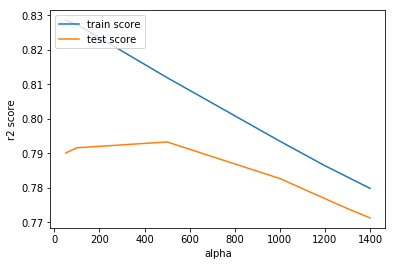

In [80]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
# plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

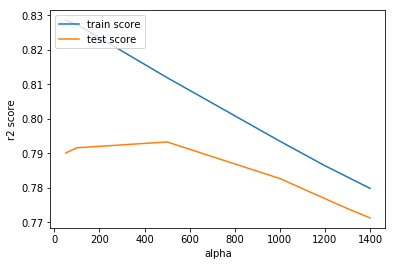

In [81]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
# plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [82]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8092044892496105
0.7948876232666372


In [83]:
lasso.coef_


array([ 3.27314858e+04,  2.62665321e+04, -2.11170982e+04,  0.00000000e+00,
       -3.00199629e+04, -9.13270713e+03,  0.00000000e+00, -0.00000000e+00,
       -2.28609896e+03,  5.75431048e+04, -1.28142829e+04,  1.25745458e+04,
       -0.00000000e+00,  2.52809631e+04, -0.00000000e+00,  4.91053006e+03,
        0.00000000e+00,  4.91410813e+01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.20233310e+04,
        1.86823364e+04, -0.00000000e+00, -0.00000000e+00,  1.51190348e+04])

In [84]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [x for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 167994.9473714532),
 ('1stFlrSF', 32731.485830112775),
 ('2ndFlrSF', 26266.53208153135),
 ('Age_of_building', -21117.0982322294),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_90', -30019.962851514174),
 ('MSSubClass_160', -9132.707131353844),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RM', -2286.098960351375),
 ('OverallQual_Good', 57543.10475608766),
 ('OverallCond_Bad', -12814.282912684657),
 ('OverallCond_Good', 12574.54578315667),
 ('BsmtCond_Bad', -0.0),
 ('BsmtExposure_Gd', 25280.963101159643),
 ('HeatingQC_Bad', -0.0),
 ('FullBath_3', 4910.530057171914),
 ('BedroomAbvGr_1', 0.0),
 ('BedroomAbvGr_2', 49.141081291704204),
 ('BedroomAbvGr_3', -0.0),
 ('BedroomAbvGr_4', -0.0),
 ('BedroomAbvGr_5', -0.0),
 ('BedroomAbvGr_6', -0.0),
 ('BedroomAbvGr_8', -0.0),
 ('TotRmsAbvGrd_More_than_10', -12023.33102757358),
 ('Fireplaces_2', 18682.33640138885),
 ('Fireplaces_3', -0.0),
 ('GarageQual_Bad', -0.0),
 ('SaleType_New', 15119.034759194588)]

In [85]:
coef_val = pd.DataFrame()
coef_val['cef_name'] = list(col)
coef_val['cef_val'] = list(lasso.coef_)
coef_val
coef_val.sort_values(by=['cef_val'], inplace = True)

In [86]:
coef_val

,cef_name,cef_val
4,MSSubClass_90,-30019.962852
2,Age_of_building,-21117.098232
10,OverallCond_Bad,-12814.282913
23,TotRmsAbvGrd_More_than_10,-12023.331028
5,MSSubClass_160,-9132.707131
8,MSZoning_RM,-2286.098960
25,Fireplaces_3,-0.000000
18,BedroomAbvGr_3,-0.000000
16,BedroomAbvGr_1,0.000000
14,HeatingQC_Bad,-0.000000


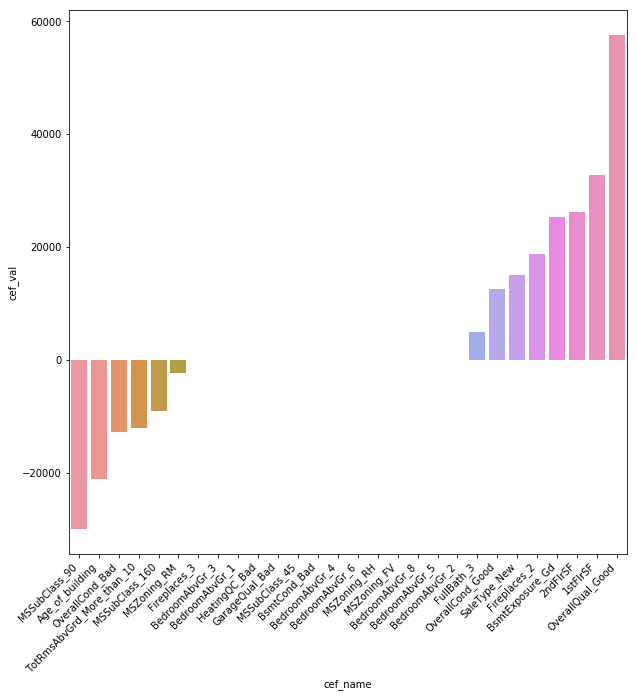

In [87]:
fig = plt.figure(figsize=(10,10))
plt.tight_layout(pad=1.4, w_pad=5.5, h_pad=1.0)
a = sns.barplot(x=coef_val['cef_name'],y=coef_val['cef_val'])
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [92]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params2, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                   10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [93]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()
model_cv.best_params_, model_cv.best_score_

({'alpha': 10}, 0.8011812350645044)

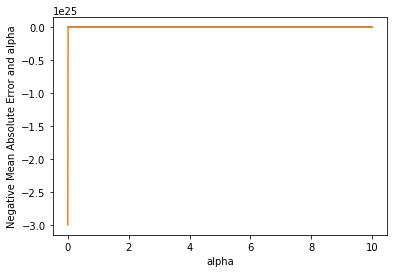

In [94]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error and alpha')
# plt.xscale('log')
plt.show()

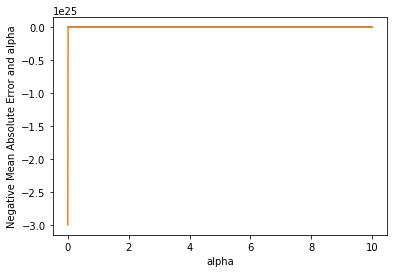

In [95]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error and alpha')
# plt.xscale('log')
plt.show()

In [96]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 33210.6602302 ,  27909.51206013, -20840.31125556,   6522.72516051,
       -32440.18704539, -18830.22975555,   5195.20178939,  -4121.67146916,
        -5804.6616652 ,  53447.19188375, -18367.11034858,  18006.01212803,
        -4309.46556398,  27229.95748877,  -1119.24038344,  18737.44602249,
         6486.46389823,   1032.84105538,  -3553.81962567,  -4317.56128487,
       -16032.51101992,  -3891.80389385,    325.28551288, -25225.62068398,
        21529.51088602, -22307.06326852,  -1576.69275707,  18701.66120654])

In [97]:
# lasso model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [x for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 171265.95293230514),
 ('1stFlrSF', 33210.66023020128),
 ('2ndFlrSF', 27909.51206012912),
 ('Age_of_building', -20840.311255562887),
 ('MSSubClass_45', 6522.725160507407),
 ('MSSubClass_90', -32440.187045387353),
 ('MSSubClass_160', -18830.22975554962),
 ('MSZoning_FV', 5195.2017893895345),
 ('MSZoning_RH', -4121.671469163268),
 ('MSZoning_RM', -5804.661665204576),
 ('OverallQual_Good', 53447.19188375115),
 ('OverallCond_Bad', -18367.110348580794),
 ('OverallCond_Good', 18006.012128033606),
 ('BsmtCond_Bad', -4309.465563976444),
 ('BsmtExposure_Gd', 27229.95748876798),
 ('HeatingQC_Bad', -1119.240383435618),
 ('FullBath_3', 18737.44602249457),
 ('BedroomAbvGr_1', 6486.463898228386),
 ('BedroomAbvGr_2', 1032.841055380895),
 ('BedroomAbvGr_3', -3553.8196256732917),
 ('BedroomAbvGr_4', -4317.561284869165),
 ('BedroomAbvGr_5', -16032.51101992339),
 ('BedroomAbvGr_6', -3891.8038938525306),
 ('BedroomAbvGr_8', 325.2855128792131),
 ('TotRmsAbvGrd_More_than_10', -25225.62068397872

In [98]:
ridge.fit(X_train, y_train) 
y_train_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7987356236406828
0.7948876232666372


In [99]:
model = XGBRegressor()
model.fit(X_train, y_train)

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:00:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [157]:
y_train_pred = model.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_train_pred = model.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_train_pred))

0.9297687190656744
0.8288419867775774


In [104]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=150,gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, n_jobs=4,iid=False, cv=5)

In [105]:
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'max_depth': 3, 'min_child_weight': 3}, 0.8539496673567457)

In [106]:
param_test1 = {
 'gamma':[i/10 for i in range(0,8)],
 'subsample':[i/10.0 for i in range(2,10)],
 'colsample_bytree':[i/10.0 for i in range(2,10)]
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=150,
 objective= 'reg:linear', nthread=5, seed=27,max_depth =3,min_child_weight = 3), 
 param_grid = param_test1, n_jobs=5,iid=False, cv=5)

In [107]:
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

[18:09:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'colsample_bytree': 0.8, 'gamma': 0.0, 'subsample': 0.7}, 0.8599961124996278)

In [117]:
param_test1 = {
#  'reg_alpha':[0.001, 0.01, 0.1, 1,10, 50, 100],
#  'reg_lambda':[0.001, 0.01, 0.1, 1,10, 50, 100]
 'reg_alpha':[1000, 2000, 3000, 4000, 5000],
 'reg_lambda':[10, 30, 50]
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=150,
 objective= 'reg:linear', nthread=5, seed=27,max_depth =5,min_child_weight = 1,gamma = 0.0,subsample=0.7,colsample_bytree=0.8), 
 param_grid = param_test1, n_jobs=5,iid=False, cv=5)

In [118]:
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

[18:31:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'reg_alpha': 2000, 'reg_lambda': 10}, 0.8504098071974958)

In [119]:
xgb = XGBRegressor(learning_rate =0.01, n_estimators=1000,
 objective= 'reg:linear', nthread=5, seed=27,max_depth =5,min_child_weight = 1,gamma = 0.0,subsample=0.6,
colsample_bytree=0.5,reg_alpha=2000,reg_lambda=10)


In [120]:
xgb.fit(X_train,y_train)

[18:32:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=5, objective='reg:linear', random_state=0,
             reg_alpha=2000, reg_lambda=10, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.6, verbosity=1)

In [129]:
y_train_pred = xgb.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_train_pred = xgb.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_train_pred))

0.9225439312067183
0.8237952418273919


In [124]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["rmse","error"]
%time xgb.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[00:37:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:194201	validation_0-error:-180122	validation_1-rmse:196978	validation_1-error:-181809
[1]	validation_0-rmse:192558	validation_0-error:-180122	validation_1-rmse:195356	validation_1-error:-181809
[2]	validation_0-rmse:190866	validation_0-error:-180122	validation_1-rmse:193693	validation_1-error:-181809
[3]	validation_0-rmse:189237	validation_0-error:-180122	validation_1-rmse:192084	validation_1-error:-181809
[4]	validation_0-rmse:187630	validation_0-error:-180122	validation_1-rmse:190500	validation_1-error:-181809
[5]	validation_0-rmse:185997	validation_0-error:-180122	validation_1-rmse:188891	validation_1-error:-181809
[6]	validation_0-rmse:184395	validation_0-error:-180122	validation_1-rmse:187313	validation_1-error:-181809
[7]	validation_0-rmse:182800	validation_0-error:-180122	validation_1-rmse:185734	validation_1-error:-181809
[8]	validation_0-rms

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18]	validation_0-rmse:166562	validation_0-error:-180122	validation_1-rmse:169620	validation_1-error:-181809
[19]	validation_0-rmse:165171	validation_0-error:-180122	validation_1-rmse:168247	validation_1-error:-181809
[20]	validation_0-rmse:163871	validation_0-error:-180122	validation_1-rmse:166943	validation_1-error:-181809
[21]	validation_0-rmse:162477	validation_0-error:-180122	validation_1-rmse:165566	validation_1-error:-181809
[22]	validation_0-rmse:161132	validation_0-error:-180122	validation_1-rmse:164236	validation_1-error:-181809
[23]	validation_0-rmse:159767	validation_0-error:-180122	validation_1-rmse:162905	validation_1-error:-181809
[24]	validation_0-rmse:158433	validation_0-error:-180122	validation_1-rmse:161586	validation_1-error:-181809
[25]	validation_0-rmse:157126	validation_0-error:-180122	validation_1-rmse:160287	validation_1-error:-181809
[26]	validation_0-rmse:155821	validation_0-error:-180122	validation_1-rmse:159022	validation_1-error:-181809
[27]	validation_0-r

[94]	validation_0-rmse:91859.7	validation_0-error:-180122	validation_1-rmse:96508.2	validation_1-error:-181809
[95]	validation_0-rmse:91294	validation_0-error:-180122	validation_1-rmse:95968	validation_1-error:-181809
[96]	validation_0-rmse:90627.1	validation_0-error:-180122	validation_1-rmse:95328.9	validation_1-error:-181809
[97]	validation_0-rmse:89967.2	validation_0-error:-180122	validation_1-rmse:94717.5	validation_1-error:-181809
[98]	validation_0-rmse:89366.8	validation_0-error:-180122	validation_1-rmse:94122.6	validation_1-error:-181809
[99]	validation_0-rmse:88778.7	validation_0-error:-180122	validation_1-rmse:93565.3	validation_1-error:-181809
[100]	validation_0-rmse:88183.5	validation_0-error:-180122	validation_1-rmse:92967	validation_1-error:-181809
[101]	validation_0-rmse:87566.5	validation_0-error:-180122	validation_1-rmse:92382.2	validation_1-error:-181809
[102]	validation_0-rmse:86946.5	validation_0-error:-180122	validation_1-rmse:91781.1	validation_1-error:-181809
[103

[168]	validation_0-rmse:58286.2	validation_0-error:-180122	validation_1-rmse:64506.3	validation_1-error:-181809
[169]	validation_0-rmse:58017.2	validation_0-error:-180122	validation_1-rmse:64250.6	validation_1-error:-181809
[170]	validation_0-rmse:57687.4	validation_0-error:-180122	validation_1-rmse:63951.6	validation_1-error:-181809
[171]	validation_0-rmse:57383.8	validation_0-error:-180122	validation_1-rmse:63674.4	validation_1-error:-181809
[172]	validation_0-rmse:57099.8	validation_0-error:-180122	validation_1-rmse:63415.2	validation_1-error:-181809
[173]	validation_0-rmse:56780.2	validation_0-error:-180122	validation_1-rmse:63129	validation_1-error:-181809
[174]	validation_0-rmse:56489.9	validation_0-error:-180122	validation_1-rmse:62855.6	validation_1-error:-181809
[175]	validation_0-rmse:56199.9	validation_0-error:-180122	validation_1-rmse:62593.6	validation_1-error:-181809
[176]	validation_0-rmse:55941.8	validation_0-error:-180122	validation_1-rmse:62351.6	validation_1-error:-1

[242]	validation_0-rmse:42965.9	validation_0-error:-180122	validation_1-rmse:50507.3	validation_1-error:-181809
[243]	validation_0-rmse:42844.5	validation_0-error:-180122	validation_1-rmse:50391.4	validation_1-error:-181809
[244]	validation_0-rmse:42718.7	validation_0-error:-180122	validation_1-rmse:50272	validation_1-error:-181809
[245]	validation_0-rmse:42583	validation_0-error:-180122	validation_1-rmse:50167.4	validation_1-error:-181809
[246]	validation_0-rmse:42471.3	validation_0-error:-180122	validation_1-rmse:50061.8	validation_1-error:-181809
[247]	validation_0-rmse:42346.6	validation_0-error:-180122	validation_1-rmse:49942.9	validation_1-error:-181809
[248]	validation_0-rmse:42183.3	validation_0-error:-180122	validation_1-rmse:49783	validation_1-error:-181809
[249]	validation_0-rmse:42076.4	validation_0-error:-180122	validation_1-rmse:49668.7	validation_1-error:-181809
[250]	validation_0-rmse:41965.3	validation_0-error:-180122	validation_1-rmse:49563.1	validation_1-error:-18180

[316]	validation_0-rmse:35747.4	validation_0-error:-180122	validation_1-rmse:43976.9	validation_1-error:-181809
[317]	validation_0-rmse:35685.2	validation_0-error:-180122	validation_1-rmse:43917.8	validation_1-error:-181809
[318]	validation_0-rmse:35616.3	validation_0-error:-180122	validation_1-rmse:43854.4	validation_1-error:-181809
[319]	validation_0-rmse:35557.1	validation_0-error:-180122	validation_1-rmse:43796.8	validation_1-error:-181809
[320]	validation_0-rmse:35495.2	validation_0-error:-180122	validation_1-rmse:43733	validation_1-error:-181809
[321]	validation_0-rmse:35435.2	validation_0-error:-180122	validation_1-rmse:43671.4	validation_1-error:-181809
[322]	validation_0-rmse:35381.5	validation_0-error:-180122	validation_1-rmse:43615	validation_1-error:-181809
[323]	validation_0-rmse:35315.3	validation_0-error:-180122	validation_1-rmse:43542.9	validation_1-error:-181809
[324]	validation_0-rmse:35263.9	validation_0-error:-180122	validation_1-rmse:43481.3	validation_1-error:-181

[390]	validation_0-rmse:31706.1	validation_0-error:-180122	validation_1-rmse:40471.1	validation_1-error:-181809
[391]	validation_0-rmse:31658	validation_0-error:-180122	validation_1-rmse:40434.3	validation_1-error:-181809
[392]	validation_0-rmse:31614.9	validation_0-error:-180122	validation_1-rmse:40394.2	validation_1-error:-181809
[393]	validation_0-rmse:31582.2	validation_0-error:-180122	validation_1-rmse:40365.2	validation_1-error:-181809
[394]	validation_0-rmse:31539.1	validation_0-error:-180122	validation_1-rmse:40314.6	validation_1-error:-181809
[395]	validation_0-rmse:31467.5	validation_0-error:-180122	validation_1-rmse:40257.4	validation_1-error:-181809
[396]	validation_0-rmse:31431.7	validation_0-error:-180122	validation_1-rmse:40217	validation_1-error:-181809
[397]	validation_0-rmse:31395	validation_0-error:-180122	validation_1-rmse:40201	validation_1-error:-181809
[398]	validation_0-rmse:31360.3	validation_0-error:-180122	validation_1-rmse:40194.9	validation_1-error:-181809


[464]	validation_0-rmse:29177.2	validation_0-error:-180122	validation_1-rmse:38478.5	validation_1-error:-181809
[465]	validation_0-rmse:29141.5	validation_0-error:-180122	validation_1-rmse:38438	validation_1-error:-181809
[466]	validation_0-rmse:29107.5	validation_0-error:-180122	validation_1-rmse:38408.5	validation_1-error:-181809
[467]	validation_0-rmse:29073.4	validation_0-error:-180122	validation_1-rmse:38377.1	validation_1-error:-181809
[468]	validation_0-rmse:29040.1	validation_0-error:-180122	validation_1-rmse:38351.9	validation_1-error:-181809
[469]	validation_0-rmse:29005.3	validation_0-error:-180122	validation_1-rmse:38333.5	validation_1-error:-181809
[470]	validation_0-rmse:28986.6	validation_0-error:-180122	validation_1-rmse:38313	validation_1-error:-181809
[471]	validation_0-rmse:28958.3	validation_0-error:-180122	validation_1-rmse:38289.4	validation_1-error:-181809
[472]	validation_0-rmse:28931.6	validation_0-error:-180122	validation_1-rmse:38277.7	validation_1-error:-181

[538]	validation_0-rmse:27208.4	validation_0-error:-180122	validation_1-rmse:36970.8	validation_1-error:-181809
[539]	validation_0-rmse:27197.5	validation_0-error:-180122	validation_1-rmse:36955.6	validation_1-error:-181809
[540]	validation_0-rmse:27179	validation_0-error:-180122	validation_1-rmse:36938.5	validation_1-error:-181809
[541]	validation_0-rmse:27155.9	validation_0-error:-180122	validation_1-rmse:36926.1	validation_1-error:-181809
[542]	validation_0-rmse:27142.4	validation_0-error:-180122	validation_1-rmse:36922.6	validation_1-error:-181809
[543]	validation_0-rmse:27115	validation_0-error:-180122	validation_1-rmse:36908	validation_1-error:-181809
[544]	validation_0-rmse:27091.7	validation_0-error:-180122	validation_1-rmse:36900.3	validation_1-error:-181809
[545]	validation_0-rmse:27067.9	validation_0-error:-180122	validation_1-rmse:36884.1	validation_1-error:-181809
[546]	validation_0-rmse:27032.6	validation_0-error:-180122	validation_1-rmse:36865.5	validation_1-error:-18180

[612]	validation_0-rmse:25782.9	validation_0-error:-180122	validation_1-rmse:36039.9	validation_1-error:-181809
[613]	validation_0-rmse:25755	validation_0-error:-180122	validation_1-rmse:36024.9	validation_1-error:-181809
[614]	validation_0-rmse:25749.4	validation_0-error:-180122	validation_1-rmse:36022.1	validation_1-error:-181809
[615]	validation_0-rmse:25735.2	validation_0-error:-180122	validation_1-rmse:36007.4	validation_1-error:-181809
[616]	validation_0-rmse:25728.6	validation_0-error:-180122	validation_1-rmse:36004.3	validation_1-error:-181809
[617]	validation_0-rmse:25716.2	validation_0-error:-180122	validation_1-rmse:35993.1	validation_1-error:-181809
[618]	validation_0-rmse:25700.4	validation_0-error:-180122	validation_1-rmse:35977.8	validation_1-error:-181809
[619]	validation_0-rmse:25684.3	validation_0-error:-180122	validation_1-rmse:35968.3	validation_1-error:-181809
[620]	validation_0-rmse:25663.4	validation_0-error:-180122	validation_1-rmse:35952.9	validation_1-error:-1

[686]	validation_0-rmse:24672.7	validation_0-error:-180122	validation_1-rmse:35327.1	validation_1-error:-181809
[687]	validation_0-rmse:24650.7	validation_0-error:-180122	validation_1-rmse:35316.1	validation_1-error:-181809
[688]	validation_0-rmse:24632.6	validation_0-error:-180122	validation_1-rmse:35299	validation_1-error:-181809
[689]	validation_0-rmse:24617.5	validation_0-error:-180122	validation_1-rmse:35290.1	validation_1-error:-181809
[690]	validation_0-rmse:24608	validation_0-error:-180122	validation_1-rmse:35283.7	validation_1-error:-181809
[691]	validation_0-rmse:24597.3	validation_0-error:-180122	validation_1-rmse:35280	validation_1-error:-181809
[692]	validation_0-rmse:24577.6	validation_0-error:-180122	validation_1-rmse:35267.2	validation_1-error:-181809
[693]	validation_0-rmse:24571.5	validation_0-error:-180122	validation_1-rmse:35261.2	validation_1-error:-181809
[694]	validation_0-rmse:24558.5	validation_0-error:-180122	validation_1-rmse:35260.8	validation_1-error:-18180

[760]	validation_0-rmse:23706.2	validation_0-error:-180122	validation_1-rmse:34712.7	validation_1-error:-181809
[761]	validation_0-rmse:23693.3	validation_0-error:-180122	validation_1-rmse:34702.5	validation_1-error:-181809
[762]	validation_0-rmse:23685.9	validation_0-error:-180122	validation_1-rmse:34704.3	validation_1-error:-181809
[763]	validation_0-rmse:23672.3	validation_0-error:-180122	validation_1-rmse:34697.9	validation_1-error:-181809
[764]	validation_0-rmse:23661.6	validation_0-error:-180122	validation_1-rmse:34691.6	validation_1-error:-181809
[765]	validation_0-rmse:23646	validation_0-error:-180122	validation_1-rmse:34681.8	validation_1-error:-181809
[766]	validation_0-rmse:23639.4	validation_0-error:-180122	validation_1-rmse:34678.2	validation_1-error:-181809
[767]	validation_0-rmse:23628.2	validation_0-error:-180122	validation_1-rmse:34668.9	validation_1-error:-181809
[768]	validation_0-rmse:23617.5	validation_0-error:-180122	validation_1-rmse:34672.6	validation_1-error:-1

[834]	validation_0-rmse:22904.9	validation_0-error:-180122	validation_1-rmse:34285.1	validation_1-error:-181809
[835]	validation_0-rmse:22891.6	validation_0-error:-180122	validation_1-rmse:34278	validation_1-error:-181809
[836]	validation_0-rmse:22879.7	validation_0-error:-180122	validation_1-rmse:34266.2	validation_1-error:-181809
[837]	validation_0-rmse:22866	validation_0-error:-180122	validation_1-rmse:34265.2	validation_1-error:-181809
[838]	validation_0-rmse:22856.7	validation_0-error:-180122	validation_1-rmse:34253.5	validation_1-error:-181809
[839]	validation_0-rmse:22842.5	validation_0-error:-180122	validation_1-rmse:34246.2	validation_1-error:-181809
[840]	validation_0-rmse:22828.9	validation_0-error:-180122	validation_1-rmse:34237.6	validation_1-error:-181809
[841]	validation_0-rmse:22813.5	validation_0-error:-180122	validation_1-rmse:34239.1	validation_1-error:-181809
[842]	validation_0-rmse:22804.2	validation_0-error:-180122	validation_1-rmse:34235.8	validation_1-error:-181

[908]	validation_0-rmse:22189	validation_0-error:-180122	validation_1-rmse:33920.2	validation_1-error:-181809
[909]	validation_0-rmse:22179.7	validation_0-error:-180122	validation_1-rmse:33920	validation_1-error:-181809
[910]	validation_0-rmse:22172.6	validation_0-error:-180122	validation_1-rmse:33911.2	validation_1-error:-181809
[911]	validation_0-rmse:22163.5	validation_0-error:-180122	validation_1-rmse:33905.5	validation_1-error:-181809
[912]	validation_0-rmse:22153	validation_0-error:-180122	validation_1-rmse:33902.2	validation_1-error:-181809
[913]	validation_0-rmse:22146.3	validation_0-error:-180122	validation_1-rmse:33902.1	validation_1-error:-181809
[914]	validation_0-rmse:22137.5	validation_0-error:-180122	validation_1-rmse:33900.7	validation_1-error:-181809
[915]	validation_0-rmse:22128.5	validation_0-error:-180122	validation_1-rmse:33902.6	validation_1-error:-181809
[916]	validation_0-rmse:22125.2	validation_0-error:-180122	validation_1-rmse:33901	validation_1-error:-181809


[982]	validation_0-rmse:21572.5	validation_0-error:-180122	validation_1-rmse:33626.1	validation_1-error:-181809
[983]	validation_0-rmse:21570.5	validation_0-error:-180122	validation_1-rmse:33625.6	validation_1-error:-181809
[984]	validation_0-rmse:21566.8	validation_0-error:-180122	validation_1-rmse:33619	validation_1-error:-181809
[985]	validation_0-rmse:21559	validation_0-error:-180122	validation_1-rmse:33614.4	validation_1-error:-181809
[986]	validation_0-rmse:21548.3	validation_0-error:-180122	validation_1-rmse:33610.5	validation_1-error:-181809
[987]	validation_0-rmse:21542.6	validation_0-error:-180122	validation_1-rmse:33613.3	validation_1-error:-181809
[988]	validation_0-rmse:21534.2	validation_0-error:-180122	validation_1-rmse:33613.1	validation_1-error:-181809
[989]	validation_0-rmse:21528.5	validation_0-error:-180122	validation_1-rmse:33618.6	validation_1-error:-181809
[990]	validation_0-rmse:21519.4	validation_0-error:-180122	validation_1-rmse:33612	validation_1-error:-18180

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=5, objective='reg:linear', random_state=0,
             reg_alpha=2000, reg_lambda=10, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.6, verbosity=1)

[00:55:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:194201	validation_0-error:-180122	validation_1-rmse:196978	validation_1-error:-181809
[1]	validation_0-rmse:192558	validation_0-error:-180122	validation_1-rmse:195356	validation_1-error:-181809
[2]	validation_0-rmse:190866	validation_0-error:-180122	validation_1-rmse:193693	validation_1-error:-181809
[3]	validation_0-rmse:189237	validation_0-error:-180122	validation_1-rmse:192084	validation_1-error:-181809
[4]	validation_0-rmse:187630	validation_0-error:-180122	validation_1-rmse:190500	validation_1-error:-181809
[5]	validation_0-rmse:185997	validation_0-error:-180122	validation_1-rmse:188891	validation_1-error:-181809
[6]	validation_0-rmse:184395	validation_0-error:-180122	validation_1-rmse:187313	validation_1-error:-181809
[7]	validation_0-rmse:182800	validation_0-error:-180122	validation_1-rmse:185734	validation_1-error:-181809
[8]	validation_0-rms

[75]	validation_0-rmse:105666	validation_0-error:-180122	validation_1-rmse:109871	validation_1-error:-181809
[76]	validation_0-rmse:104883	validation_0-error:-180122	validation_1-rmse:109107	validation_1-error:-181809
[77]	validation_0-rmse:104083	validation_0-error:-180122	validation_1-rmse:108335	validation_1-error:-181809
[78]	validation_0-rmse:103311	validation_0-error:-180122	validation_1-rmse:107570	validation_1-error:-181809
[79]	validation_0-rmse:102552	validation_0-error:-180122	validation_1-rmse:106843	validation_1-error:-181809
[80]	validation_0-rmse:101798	validation_0-error:-180122	validation_1-rmse:106104	validation_1-error:-181809
[81]	validation_0-rmse:101067	validation_0-error:-180122	validation_1-rmse:105379	validation_1-error:-181809
[82]	validation_0-rmse:100332	validation_0-error:-180122	validation_1-rmse:104682	validation_1-error:-181809
[83]	validation_0-rmse:99571.4	validation_0-error:-180122	validation_1-rmse:103950	validation_1-error:-181809
[84]	validation_0-

[149]	validation_0-rmse:64648.8	validation_0-error:-180122	validation_1-rmse:70426	validation_1-error:-181809
[150]	validation_0-rmse:64249	validation_0-error:-180122	validation_1-rmse:70054.5	validation_1-error:-181809
[151]	validation_0-rmse:63888.2	validation_0-error:-180122	validation_1-rmse:69731.6	validation_1-error:-181809
[152]	validation_0-rmse:63503.7	validation_0-error:-180122	validation_1-rmse:69381.8	validation_1-error:-181809
[153]	validation_0-rmse:63152.6	validation_0-error:-180122	validation_1-rmse:69043	validation_1-error:-181809
[154]	validation_0-rmse:62771.1	validation_0-error:-180122	validation_1-rmse:68693	validation_1-error:-181809
[155]	validation_0-rmse:62405.8	validation_0-error:-180122	validation_1-rmse:68376	validation_1-error:-181809
[156]	validation_0-rmse:62078.6	validation_0-error:-180122	validation_1-rmse:68053.4	validation_1-error:-181809
[157]	validation_0-rmse:61743.4	validation_0-error:-180122	validation_1-rmse:67727.5	validation_1-error:-181809
[1

[223]	validation_0-rmse:45946	validation_0-error:-180122	validation_1-rmse:53224.9	validation_1-error:-181809
[224]	validation_0-rmse:45785.9	validation_0-error:-180122	validation_1-rmse:53084.1	validation_1-error:-181809
[225]	validation_0-rmse:45620.3	validation_0-error:-180122	validation_1-rmse:52936.4	validation_1-error:-181809
[226]	validation_0-rmse:45477	validation_0-error:-180122	validation_1-rmse:52797.2	validation_1-error:-181809
[227]	validation_0-rmse:45301.8	validation_0-error:-180122	validation_1-rmse:52632.3	validation_1-error:-181809
[228]	validation_0-rmse:45134.7	validation_0-error:-180122	validation_1-rmse:52491.6	validation_1-error:-181809
[229]	validation_0-rmse:44989.5	validation_0-error:-180122	validation_1-rmse:52359.3	validation_1-error:-181809
[230]	validation_0-rmse:44823	validation_0-error:-180122	validation_1-rmse:52217.3	validation_1-error:-181809
[231]	validation_0-rmse:44654.3	validation_0-error:-180122	validation_1-rmse:52068.8	validation_1-error:-18180

[297]	validation_0-rmse:37074.6	validation_0-error:-180122	validation_1-rmse:45221.7	validation_1-error:-181809
[298]	validation_0-rmse:36972	validation_0-error:-180122	validation_1-rmse:45150	validation_1-error:-181809
[299]	validation_0-rmse:36903.4	validation_0-error:-180122	validation_1-rmse:45074.5	validation_1-error:-181809
[300]	validation_0-rmse:36823.8	validation_0-error:-180122	validation_1-rmse:44999.9	validation_1-error:-181809
[301]	validation_0-rmse:36743	validation_0-error:-180122	validation_1-rmse:44918.3	validation_1-error:-181809
[302]	validation_0-rmse:36647.3	validation_0-error:-180122	validation_1-rmse:44833.6	validation_1-error:-181809
[303]	validation_0-rmse:36569.9	validation_0-error:-180122	validation_1-rmse:44754.4	validation_1-error:-181809
[304]	validation_0-rmse:36495.7	validation_0-error:-180122	validation_1-rmse:44691.6	validation_1-error:-181809
[305]	validation_0-rmse:36414.6	validation_0-error:-180122	validation_1-rmse:44627.7	validation_1-error:-18180

[371]	validation_0-rmse:32558.5	validation_0-error:-180122	validation_1-rmse:41157.7	validation_1-error:-181809
[372]	validation_0-rmse:32511.6	validation_0-error:-180122	validation_1-rmse:41120.3	validation_1-error:-181809
[373]	validation_0-rmse:32470.8	validation_0-error:-180122	validation_1-rmse:41090	validation_1-error:-181809
[374]	validation_0-rmse:32426.1	validation_0-error:-180122	validation_1-rmse:41052.4	validation_1-error:-181809
[375]	validation_0-rmse:32377.1	validation_0-error:-180122	validation_1-rmse:41003.9	validation_1-error:-181809
[376]	validation_0-rmse:32353.8	validation_0-error:-180122	validation_1-rmse:40979.3	validation_1-error:-181809
[377]	validation_0-rmse:32310.2	validation_0-error:-180122	validation_1-rmse:40941.1	validation_1-error:-181809
[378]	validation_0-rmse:32263.1	validation_0-error:-180122	validation_1-rmse:40924.5	validation_1-error:-181809
[379]	validation_0-rmse:32225.1	validation_0-error:-180122	validation_1-rmse:40890.4	validation_1-error:-1

[445]	validation_0-rmse:29669.2	validation_0-error:-180122	validation_1-rmse:38896.1	validation_1-error:-181809
[446]	validation_0-rmse:29641.1	validation_0-error:-180122	validation_1-rmse:38873.4	validation_1-error:-181809
[447]	validation_0-rmse:29617.4	validation_0-error:-180122	validation_1-rmse:38848.8	validation_1-error:-181809
[448]	validation_0-rmse:29598.5	validation_0-error:-180122	validation_1-rmse:38834.7	validation_1-error:-181809
[449]	validation_0-rmse:29581.3	validation_0-error:-180122	validation_1-rmse:38819.5	validation_1-error:-181809
[450]	validation_0-rmse:29554.6	validation_0-error:-180122	validation_1-rmse:38789.2	validation_1-error:-181809
[451]	validation_0-rmse:29528.1	validation_0-error:-180122	validation_1-rmse:38771.5	validation_1-error:-181809
[452]	validation_0-rmse:29497.5	validation_0-error:-180122	validation_1-rmse:38747.3	validation_1-error:-181809
[453]	validation_0-rmse:29476.8	validation_0-error:-180122	validation_1-rmse:38723.9	validation_1-error:

[519]	validation_0-rmse:27675.7	validation_0-error:-180122	validation_1-rmse:37344.4	validation_1-error:-181809
[520]	validation_0-rmse:27655.8	validation_0-error:-180122	validation_1-rmse:37329.8	validation_1-error:-181809
[521]	validation_0-rmse:27627.4	validation_0-error:-180122	validation_1-rmse:37302.6	validation_1-error:-181809
[522]	validation_0-rmse:27611.9	validation_0-error:-180122	validation_1-rmse:37299.2	validation_1-error:-181809
[523]	validation_0-rmse:27577.5	validation_0-error:-180122	validation_1-rmse:37270.5	validation_1-error:-181809
[524]	validation_0-rmse:27550.9	validation_0-error:-180122	validation_1-rmse:37260.2	validation_1-error:-181809
[525]	validation_0-rmse:27521.5	validation_0-error:-180122	validation_1-rmse:37238.2	validation_1-error:-181809
[526]	validation_0-rmse:27495.6	validation_0-error:-180123	validation_1-rmse:37218.1	validation_1-error:-181809
[527]	validation_0-rmse:27473.1	validation_0-error:-180122	validation_1-rmse:37203.5	validation_1-error:

[593]	validation_0-rmse:26121.4	validation_0-error:-180122	validation_1-rmse:36245.5	validation_1-error:-181809
[594]	validation_0-rmse:26104.1	validation_0-error:-180122	validation_1-rmse:36233	validation_1-error:-181809
[595]	validation_0-rmse:26087	validation_0-error:-180122	validation_1-rmse:36230.9	validation_1-error:-181809
[596]	validation_0-rmse:26060.2	validation_0-error:-180122	validation_1-rmse:36206.6	validation_1-error:-181809
[597]	validation_0-rmse:26042.4	validation_0-error:-180122	validation_1-rmse:36195.2	validation_1-error:-181809
[598]	validation_0-rmse:26025.8	validation_0-error:-180122	validation_1-rmse:36206.6	validation_1-error:-181809
[599]	validation_0-rmse:26012.5	validation_0-error:-180122	validation_1-rmse:36196.5	validation_1-error:-181809
[600]	validation_0-rmse:25994.9	validation_0-error:-180122	validation_1-rmse:36175.3	validation_1-error:-181809
[601]	validation_0-rmse:25981.8	validation_0-error:-180122	validation_1-rmse:36170.9	validation_1-error:-181

[667]	validation_0-rmse:24929.3	validation_0-error:-180122	validation_1-rmse:35477.9	validation_1-error:-181809
[668]	validation_0-rmse:24918.4	validation_0-error:-180122	validation_1-rmse:35474.7	validation_1-error:-181809
[669]	validation_0-rmse:24896	validation_0-error:-180122	validation_1-rmse:35457.3	validation_1-error:-181809
[670]	validation_0-rmse:24879.8	validation_0-error:-180122	validation_1-rmse:35441.6	validation_1-error:-181809
[671]	validation_0-rmse:24862.1	validation_0-error:-180122	validation_1-rmse:35435.5	validation_1-error:-181809
[672]	validation_0-rmse:24839.5	validation_0-error:-180122	validation_1-rmse:35410	validation_1-error:-181809
[673]	validation_0-rmse:24833.2	validation_0-error:-180122	validation_1-rmse:35405.9	validation_1-error:-181809
[674]	validation_0-rmse:24825.4	validation_0-error:-180122	validation_1-rmse:35399.1	validation_1-error:-181809
[675]	validation_0-rmse:24817.1	validation_0-error:-180122	validation_1-rmse:35385.6	validation_1-error:-181

[741]	validation_0-rmse:23929.2	validation_0-error:-180122	validation_1-rmse:34875	validation_1-error:-181809
[742]	validation_0-rmse:23924.4	validation_0-error:-180122	validation_1-rmse:34872.7	validation_1-error:-181809
[743]	validation_0-rmse:23909.8	validation_0-error:-180122	validation_1-rmse:34866.6	validation_1-error:-181809
[744]	validation_0-rmse:23897.5	validation_0-error:-180122	validation_1-rmse:34859.9	validation_1-error:-181809
[745]	validation_0-rmse:23886.9	validation_0-error:-180122	validation_1-rmse:34847.8	validation_1-error:-181809
[746]	validation_0-rmse:23871.5	validation_0-error:-180122	validation_1-rmse:34837	validation_1-error:-181809
[747]	validation_0-rmse:23865.5	validation_0-error:-180122	validation_1-rmse:34832	validation_1-error:-181809
[748]	validation_0-rmse:23851	validation_0-error:-180122	validation_1-rmse:34819.7	validation_1-error:-181809
[749]	validation_0-rmse:23836.7	validation_0-error:-180122	validation_1-rmse:34813.1	validation_1-error:-181809


[815]	validation_0-rmse:23078.6	validation_0-error:-180122	validation_1-rmse:34385.2	validation_1-error:-181809
[816]	validation_0-rmse:23064.3	validation_0-error:-180122	validation_1-rmse:34373.7	validation_1-error:-181809
[817]	validation_0-rmse:23051.1	validation_0-error:-180122	validation_1-rmse:34372.3	validation_1-error:-181809
[818]	validation_0-rmse:23034	validation_0-error:-180122	validation_1-rmse:34360.4	validation_1-error:-181809
[819]	validation_0-rmse:23028	validation_0-error:-180122	validation_1-rmse:34357.1	validation_1-error:-181809
[820]	validation_0-rmse:23012.8	validation_0-error:-180122	validation_1-rmse:34345.2	validation_1-error:-181809
[821]	validation_0-rmse:23002.3	validation_0-error:-180122	validation_1-rmse:34337	validation_1-error:-181809
[822]	validation_0-rmse:22989.4	validation_0-error:-180122	validation_1-rmse:34328.5	validation_1-error:-181809
[823]	validation_0-rmse:22983.4	validation_0-error:-180122	validation_1-rmse:34325.4	validation_1-error:-18180

[889]	validation_0-rmse:22360.8	validation_0-error:-180122	validation_1-rmse:33990.1	validation_1-error:-181809
[890]	validation_0-rmse:22355.9	validation_0-error:-180122	validation_1-rmse:33987.6	validation_1-error:-181809
[891]	validation_0-rmse:22349.1	validation_0-error:-180122	validation_1-rmse:33986	validation_1-error:-181809
[892]	validation_0-rmse:22341.1	validation_0-error:-180122	validation_1-rmse:33985	validation_1-error:-181809
[893]	validation_0-rmse:22328.7	validation_0-error:-180122	validation_1-rmse:33980.4	validation_1-error:-181809
[894]	validation_0-rmse:22315.6	validation_0-error:-180122	validation_1-rmse:33975.3	validation_1-error:-181809
[895]	validation_0-rmse:22300.9	validation_0-error:-180122	validation_1-rmse:33973	validation_1-error:-181809
[896]	validation_0-rmse:22293.4	validation_0-error:-180122	validation_1-rmse:33973.2	validation_1-error:-181809
[897]	validation_0-rmse:22286.2	validation_0-error:-180122	validation_1-rmse:33964.1	validation_1-error:-18180

[963]	validation_0-rmse:21715.7	validation_0-error:-180122	validation_1-rmse:33704.9	validation_1-error:-181809
[964]	validation_0-rmse:21710.9	validation_0-error:-180122	validation_1-rmse:33700.2	validation_1-error:-181809
[965]	validation_0-rmse:21705.6	validation_0-error:-180122	validation_1-rmse:33697.9	validation_1-error:-181809
[966]	validation_0-rmse:21693.2	validation_0-error:-180122	validation_1-rmse:33695.5	validation_1-error:-181809
[967]	validation_0-rmse:21687.2	validation_0-error:-180122	validation_1-rmse:33697.3	validation_1-error:-181809
[968]	validation_0-rmse:21683.5	validation_0-error:-180122	validation_1-rmse:33693	validation_1-error:-181809
[969]	validation_0-rmse:21669.6	validation_0-error:-180122	validation_1-rmse:33683.2	validation_1-error:-181809
[970]	validation_0-rmse:21662.4	validation_0-error:-180122	validation_1-rmse:33680.6	validation_1-error:-181809
[971]	validation_0-rmse:21654.9	validation_0-error:-180122	validation_1-rmse:33671.1	validation_1-error:-1

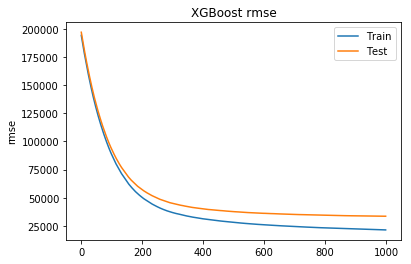

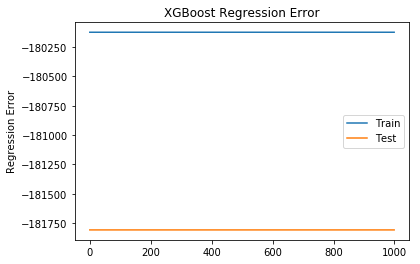

In [128]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb.fit(X_train, y_train, eval_metric=["rmse", "error"], eval_set=eval_set, verbose=True)
results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost rmse')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Regression Error')
plt.title('XGBoost Regression Error')
plt.show()



In [146]:
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=5, eval_metric="rmse", eval_set=eval_set, verbose=True)


[01:24:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:196978
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:195356
[2]	validation_0-rmse:193693
[3]	validation_0-rmse:192084
[4]	validation_0-rmse:190500
[5]	validation_0-rmse:188891
[6]	validation_0-rmse:187313
[7]	validation_0-rmse:185734
[8]	validation_0-rmse:184212
[9]	validation_0-rmse:182659
[10]	validation_0-rmse:181183
[11]	validation_0-rmse:179716
[12]	validation_0-rmse:178211
[13]	validation_0-rmse:176745
[14]	validation_0-rmse:175301
[15]	validation_0-rmse:173844
[16]	validation_0-rmse:172421
[17]	validation_0-rmse:170992
[18]	validation_0-rmse:169620
[19]	validation_0-rmse:168247
[20]	validation_0-rmse:166943
[21]	validation_0-rmse:165566
[22]	validation_0-rmse:164236
[23]	validation_0-rmse:162905
[24]	validation_0-rmse:161586
[25]	validation_0-rmse:160287
[26]	validation_0-rmse:159022
[27]	validation_0-rm

[258]	validation_0-rmse:48637.6
[259]	validation_0-rmse:48543
[260]	validation_0-rmse:48462.2
[261]	validation_0-rmse:48341.1
[262]	validation_0-rmse:48251.8
[263]	validation_0-rmse:48145
[264]	validation_0-rmse:48061.2
[265]	validation_0-rmse:47926.6
[266]	validation_0-rmse:47819.4
[267]	validation_0-rmse:47709.6
[268]	validation_0-rmse:47659.5
[269]	validation_0-rmse:47549.6
[270]	validation_0-rmse:47460.6
[271]	validation_0-rmse:47368.8
[272]	validation_0-rmse:47279.2
[273]	validation_0-rmse:47192.8
[274]	validation_0-rmse:47109.3
[275]	validation_0-rmse:47002.2
[276]	validation_0-rmse:46881.2
[277]	validation_0-rmse:46777.1
[278]	validation_0-rmse:46685.1
[279]	validation_0-rmse:46598.7
[280]	validation_0-rmse:46493.2
[281]	validation_0-rmse:46409.2
[282]	validation_0-rmse:46312.6
[283]	validation_0-rmse:46218.6
[284]	validation_0-rmse:46131.2
[285]	validation_0-rmse:46062.9
[286]	validation_0-rmse:45973.3
[287]	validation_0-rmse:45878.1
[288]	validation_0-rmse:45809.6
[289]	valida

[516]	validation_0-rmse:37408.4
[517]	validation_0-rmse:37390.3
[518]	validation_0-rmse:37380.8
[519]	validation_0-rmse:37344.4
[520]	validation_0-rmse:37329.8
[521]	validation_0-rmse:37302.6
[522]	validation_0-rmse:37299.2
[523]	validation_0-rmse:37270.5
[524]	validation_0-rmse:37260.2
[525]	validation_0-rmse:37238.2
[526]	validation_0-rmse:37218.1
[527]	validation_0-rmse:37203.5
[528]	validation_0-rmse:37172.7
[529]	validation_0-rmse:37157
[530]	validation_0-rmse:37134.5
[531]	validation_0-rmse:37125.6
[532]	validation_0-rmse:37107.9
[533]	validation_0-rmse:37072.1
[534]	validation_0-rmse:37042.9
[535]	validation_0-rmse:37032.2
[536]	validation_0-rmse:37015.3
[537]	validation_0-rmse:36997.4
[538]	validation_0-rmse:36970.8
[539]	validation_0-rmse:36955.6
[540]	validation_0-rmse:36938.5
[541]	validation_0-rmse:36926.1
[542]	validation_0-rmse:36922.6
[543]	validation_0-rmse:36908
[544]	validation_0-rmse:36900.3
[545]	validation_0-rmse:36884.1
[546]	validation_0-rmse:36865.5
[547]	valida

[774]	validation_0-rmse:34650.7
[775]	validation_0-rmse:34652.9
[776]	validation_0-rmse:34642.2
[777]	validation_0-rmse:34624.2
[778]	validation_0-rmse:34610.4
[779]	validation_0-rmse:34603
[780]	validation_0-rmse:34584.6
[781]	validation_0-rmse:34585.8
[782]	validation_0-rmse:34576.7
[783]	validation_0-rmse:34571.2
[784]	validation_0-rmse:34557.8
[785]	validation_0-rmse:34553.4
[786]	validation_0-rmse:34543.7
[787]	validation_0-rmse:34525.6
[788]	validation_0-rmse:34517.4
[789]	validation_0-rmse:34505.7
[790]	validation_0-rmse:34507.5
[791]	validation_0-rmse:34505.8
[792]	validation_0-rmse:34503.6
[793]	validation_0-rmse:34504.8
[794]	validation_0-rmse:34501.3
[795]	validation_0-rmse:34499.7
[796]	validation_0-rmse:34499.2
[797]	validation_0-rmse:34495
[798]	validation_0-rmse:34492.4
[799]	validation_0-rmse:34496.6
[800]	validation_0-rmse:34489.9
[801]	validation_0-rmse:34486.7
[802]	validation_0-rmse:34489.9
[803]	validation_0-rmse:34488.8
[804]	validation_0-rmse:34477.6
[805]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=5, objective='reg:linear', random_state=0,
             reg_alpha=2000, reg_lambda=10, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.6, verbosity=1)

In [147]:
y_train_pred = xgb.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_train_pred = xgb.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_train_pred))

0.9221687350275865
0.8239309495274858


In [150]:
# coef_val1 = pd.DataFrame()
# a = list(ridge.coef_)
# flat = [x for sublist in a for x in sublist]
# coef_val1['cef_val'] = flat
# coef_val1['cef_name'] = list(X_train.columns)
# coef_val1
# coef_val1.sort_values(by=['cef_val'], inplace = True)
# fig = plt.figure(figsize=(10,10))
# plt.tight_layout(pad=1.4, w_pad=5.5, h_pad=1.0)
# a = sns.barplot(x=coef_val1['cef_name'],y=coef_val1['cef_val'])
# a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()

In [148]:
df_1_test[['1stFlrSF','2ndFlrSF','BsmtUnfSF','EnclosedPorch','GarageArea','GrLivArea','LotArea','LotFrontage','MasVnrArea','OpenPorchSF','TotalBsmtSF','WoodDeckSF','Age_of_building','Lastremovated']] = scaler.transform(df_1_test[['1stFlrSF','2ndFlrSF','BsmtUnfSF','EnclosedPorch','GarageArea','GrLivArea','LotArea','LotFrontage','MasVnrArea','OpenPorchSF','TotalBsmtSF','WoodDeckSF','Age_of_building','Lastremovated']])

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [149]:
df_1_test

,1stFlrSF,2ndFlrSF,BsmtUnfSF,EnclosedPorch,GarageArea,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,SalePrice,TotalBsmtSF,WoodDeckSF,Age_of_building,Lastremovated,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_TA,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Condition1_Near_Rail,Condition1_Norm,Condition1_PosF,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,...,MasVnrType_BrkFace,ExterQual_Good,ExterCond_Bad,ExterCond_Good,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Good,BsmtCond_Bad,BsmtCond_Good,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,HeatingQC_Bad,HeatingQC_Good,Electrical_SBrkr,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Good,TotRmsAbvGrd_8_to_10,TotRmsAbvGrd_More_than_10,TotRmsAbvGrd_within_4,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Bad,GarageQual_Good,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Others,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,-0.692411,-0.790129,-0.655337,-0.369395,1.215542,-1.194344,0.667562,0.428717,-0.566664,-0.709347,NaN,-0.409847,0.386765,0.337995,1.160900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1462,0.411161,-0.790129,-0.352068,-0.369395,-0.750391,-0.358552,1.478310,0.470260,0.022227,-0.164951,NaN,0.639357,2.437138,0.436904,1.306386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1463,-0.610853,0.829256,-0.951917,-0.369395,0.049151,0.220520,1.344360,0.179459,-0.566664,-0.195195,NaN,-0.301876,0.970270,-0.848912,-0.633434,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1464,-0.615951,0.776124,-0.534922,-0.369395,-0.007287,0.172264,0.163641,0.345631,-0.457610,-0.164951,NaN,-0.306570,2.169698,-0.881882,-0.633434,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1465,0.286277,-0.790129,1.010415,-0.369395,0.162027,-0.453133,-1.360688,-1.108373,-0.566664,0.530666,NaN,0.524344,-0.747828,-0.684064,-0.342461,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1466,-1.031383,1.270487,0.444015,-0.369395,-0.148383,0.270706,0.170385,0.221002,-0.566664,0.560910,NaN,-0.689166,0.524537,-0.717033,-0.439452,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1467,0.049251,-0.790129,-0.737845,-0.369395,-0.242447,-0.632645,-0.448788,0.270974,-0.566664,-0.391783,NaN,0.261456,3.166519,-0.684064,-1.069893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1468,-0.965118,0.771504,0.501993,-0.369395,-0.369433,-0.096039,-0.319436,-0.277513,-0.566664,0.424811,NaN,-0.628138,-0.747828,-0.881882,-0.633434,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [153]:
# df_1_test.drop(['GrLivArea','MSZoning_RL'],axis = 1, inplace = True)

In [151]:
df_1_test = df_1_test[col]

In [154]:
# alpha =1200

# lasso = Lasso(alpha=alpha)
        
# lasso.fit(X_train, y_train) 
y_train_pred = xgb.predict(df_1_test)
# print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# y_test_pred = lasso.predict(X_test)
# print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

In [155]:
df_1_test['SalePrice'] = y_train_pred

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [876]:
df_1_test.head()

,BsmtUnfSF,TotalBsmtSF,MSSubClass_45,MSSubClass_70,MSSubClass_160,LotConfig_CulDSac,Condition1_Norm,Condition1_PosF,OverallQual_Good,OverallCond_Bad,OverallCond_Good,MasVnrType_BrkCmn,ExterQual_Good,BsmtExposure_Gd,FullBath_2,FullBath_3,HalfBath_2,BedroomAbvGr_5,Fireplaces_2,GarageType_Basment,SaleType_New,SaleType_Others,SaleType_WD,Years_old,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,
1461,-0.673793,-0.428617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.331011,138548.325782
1462,-0.365338,0.664639,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.429896,166143.408161
1463,-0.975443,-0.316112,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.855611,168987.765123
1464,-0.551318,-0.321004,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.888573,165418.407823
1465,1.020438,0.544797,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,-0.690802,267996.638308


In [156]:
df_1_test.to_csv('House_predict_result_Xgb.csv')